# vta: Mini-Challenge 1

Unser Ziel in dieser Mini-Challenge war es, ein grundlegendes Verständnis für numerische Näherungsverfahren in höheren Dimensionen zu entwickeln, insbesondere für das Gradientenabstiegsverfahren und dessen praktische Anwendung. Zu diesem Zweck haben wir mit Jupyter Notebook begonnen, indem wir das MNIST-Datenset heruntergeladen und erkundet haben. Unser Ziel war es jedoch nicht nur, unsere mathematischen Kenntnisse in der Praxis zu demonstrieren, sondern auch unsere Fähigkeiten in Kommunikation, Argumentation und Präsentation der Ergebnisse unter Beweis zu stellen. Das bedeutet, dass unsere Abgabe sowohl mathematisch korrekt als auch leicht verständlich und reproduzierbar sein musste.

Erlaubte Werkzeuge umfassten `numpy`, `matplotlib` und eingebaute Pakete wie `time`, `sys` und `math`, sowie `torchvision` für die erste Aufgabe. Die Verwendung anderer 3rd-Party Pakete, insbesondere `PyTorch`, `TensorFlow`, `Keras` und `scikit-learn`, war ausserhalb der ersten Aufgabe nicht gestattet.

Dementsprechend begannen wir mit dem Import der erforderlichen Pakete, wie in der Aufgabenstellung vorgesehen. Für die erste Aufgabe setzten wir `torchvision.transforms` ein, um die MNIST-Daten in ein Numpy-Array zu konvertieren.

In [2]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms # für die numpy arrays
import matplotlib.pyplot as plt
import unittest
import numpy as np

# Aufgabe 1 — Datenladung und -verarbeitung
### Vorverarbeitung des MNIST-Datensatzes
Zu Beginn führen wir mehrere Vorverarbeitungsschritte für den MNIST-Datensatz durch, die eine effiziente Analyse und Verarbeitung ermöglichen. Diese Schritte umfassen die Definition von Transformationen, das Laden der Daten, das Umformen der Datenstrukturen und das Normalisieren der Pixelwerte.

### Transformationen definieren
Wir verwenden die Funktion `transforms.Compose`, um einen Satz von Transformationen festzulegen. Die Transformation `ToTensor()` ist besonders wichtig, da sie die Bilddaten von einem NumPy-Array in einen PyTorch-Tensor umwandelt.

### Datensatz laden
Mithilfe der Funktion `datasets.MNIST` laden wir den MNIST-Datensatz und wenden die vorher definierten Transformationen an. Dabei trennen wir die Daten in Trainings- und Testsets sowie zugehörige Labels `X_train`, `y_train`, `X_test`, `y_test`.

### Daten umformen
Die Trainings- und Testdatenarrays `X_train` und `X_test` werden von 2D-Arrays der Dimension [N, 28, 28] in 1D-Arrays der Dimension [N, 784] umgeformt, was jedem Bild einen flachen Vektor mit 784 Pixelwerten zuordnet.

### Daten normalisieren
Zur Normalisierung werden die Pixelwerte in den Arrays X_train und X_test durch 255.0 geteilt, um die Werte auf einen Bereich zwischen 0 und 1 zu skalieren.

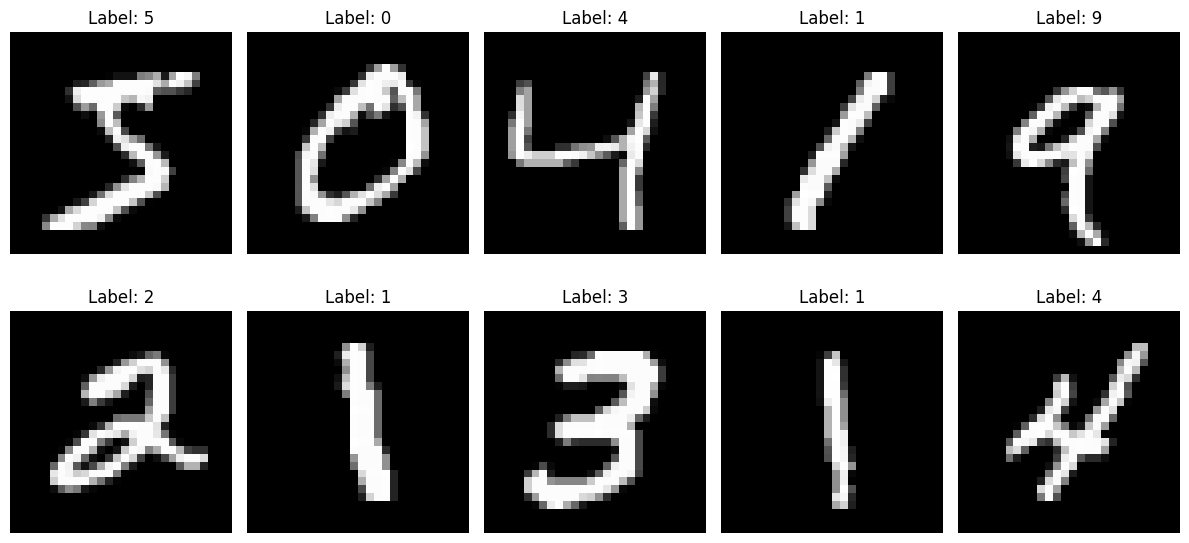

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

# Laden des MNIST-Datensatzes
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Konvertierung in Numpy-Arrays und extrahieren der Labels und Bilder
X_train, y_train = train_set.data.numpy(), train_set.targets.numpy()
X_test, y_test = test_set.data.numpy(), test_set.targets.numpy()

# Veränderung der Form der Bilder von 2D (28x28) zu 1D (784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalisierung der Pixelwerte auf den Bereich [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Visualisierung der ersten 10 Bilder
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
classes = np.unique(y_train)

print('Anzahl der Trainingsbeispiele: ', X_train.shape[0])
print('Anzahl der Testbeispiele: ', X_test.shape[0])
print('Jedes Bild hat die Grösse: ', X_train.shape[1])
print('Es gibt {} Klassen: {}'.format(len(classes), classes))
print('Der Datentyp ist: ', X_train.dtype)
print('Der Datentyp der Labels ist: ', y_train.dtype)
print('Der Bereich der Pixelwerte liegt zwischen [{}, {}]'.format(np.min(X_train), np.max(X_train)))

Anzahl der Trainingsbeispiele:  60000
Anzahl der Testbeispiele:  10000
Jedes Bild hat die Grösse:  784
Es gibt 10 Klassen: [0 1 2 3 4 5 6 7 8 9]
Der Datentyp ist:  float64
Der Datentyp der Labels ist:  int64
Der Bereich der Pixelwerte liegt zwischen [0.0, 1.0]


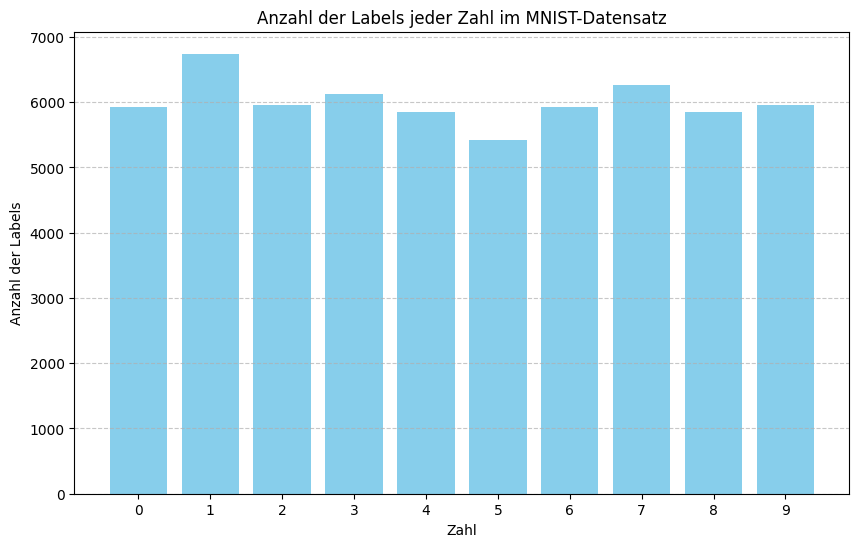

In [5]:
# Durchlauf für alle Bilder im Trainingsdatensatz und Zählen der Anzahl für jede Ziffer
class_counts = {i: 0 for i in range(10)}
for img, label in train_set:
    class_counts[label] += 1

digits = list(class_counts.keys())
counts = list(class_counts.values())

# Erstellung eines Balkendiagramms, um die Verteilung der Ziffern im Datensatz zu visualisieren
plt.figure(figsize=(10, 6))
plt.bar(digits, counts, color='skyblue')
plt.xlabel('Zahl')
plt.ylabel('Anzahl der Labels')
plt.title('Anzahl der Labels jeder Zahl im MNIST-Datensatz')
plt.xticks(digits)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
for digit in range(10):
    train_count = np.sum(y_train == digit)
    test_count = np.sum(y_test == digit)
    print(f"Class {digit}: {train_count} train examples, {test_count} test examples")

Class 0: 5923 train examples, 980 test examples
Class 1: 6742 train examples, 1135 test examples
Class 2: 5958 train examples, 1032 test examples
Class 3: 6131 train examples, 1010 test examples
Class 4: 5842 train examples, 982 test examples
Class 5: 5421 train examples, 892 test examples
Class 6: 5918 train examples, 958 test examples
Class 7: 6265 train examples, 1028 test examples
Class 8: 5851 train examples, 974 test examples
Class 9: 5949 train examples, 1009 test examples


# Aufgabe 2
### Lineare Layer
Diese Klasse implementiert eine fundamentale Komponente eines neuronalen Netzes. Die `__init__`-Funktion initialisiert die Parameter der Layer, einschliesslich der Eingabegrösse, Ausgabegrösse, Aktivierungsfunktion und deren Ableitung. Zusätzlich werden die Gewichte und Bias zufällig mit kleinen Werten initialisiert.

#### forward
Die `forward`-Funktion verarbeitet die Layer Eingabedaten durch Berechnung des dot-Produkts mit den Gewichtsmatrizen, gefolgt von einer Addition des Bias-Vektors. Wird eine Aktivierungsfunktion spezifiziert, modifiziert diese den Output der linearen Transformation bevor dieser weitergeleitet oder zurückgegeben wird.

#### backward
Die `backward`-Funktion dient der Berechnung der Gradienten für die Parameter und Eingabedaten basierend auf dem Gradienten des nachfolgenden Verlustes. Falls eine Aktivierungsfunktion definiert ist, modifiziert der Gradient dieser Funktion zunächst den übergeordneten Verlustgradienten. Danach werden die Gradienten für die Gewichte und den Bias berechnet und der Fehlergradient für die Eingabedaten durch Rückpropagation ermittelt.

#### update
Die `update`-Funktion passt die Gewichte und den Bias der Layer anhand des berechneten Gradienten und einer vorgegebenen Lernrate an. Dieser Schritt reduziert den Gesamtfehler im Netz und verbessert die Leistung des Modells schrittweise.

Insgesamt implementiert diese Klasse eine vollständig verbundene Layer mit optionaler Aktivierungsfunktion, die in einem neuronalen Netzwerk verwendet werden kann.

In [7]:
class LinearLayer:
        def __init__(self, input_size, output_size, activation_fn=None, activation_fn_grad=None):
            """
            Initialisiert eine lineare Layer als Teil eines neuronalen Netzwerks.

            Args:
                input_size (int): Die Grösse der Eingabedaten.
                output_size (int): Die Grösse der Ausgabedaten.
                activation_fn (callable, optional): Die Aktivierungsfunktion, die nach der linearen Transformation angewendet wird.
                activation_fn_grad (callable, optional): Die Ableitung der Aktivierungsfunktion, die während des Backpropagation-Prozesses verwendet wird.
            """
            self.x = None # Eingabedaten werden gespeichert
            self.bias_grad = None # Gradient des Bias
            self.weights_grad = None # GRadient der Gewichte

            self.input_size = input_size
            self.output_size = output_size
            self.activation_fn = activation_fn
            self.activation_fn_grad = activation_fn_grad
            self.weights = np.random.randn(input_size, output_size) * 0.01
            self.bias = np.zeros((1, output_size)) # Bias Initialisieren

        def forward(self, x):
            """
            Führt den Vorwärtsdurchlauf durch, indem die lineare Transformation und die Aktivierungsfunktion angewendet werden.

            Args:
                x (np.array): Die Eingabedaten für die Layer.

            Returns:
                np.array: Das Ergebnis der Vorwärtspropagation durch die Layer.
            """
            self.x = x # Speicher der Eingabe
            linear_output = np.dot(x, self.weights) + self.bias # Berchnung des linearen Ausgangs
            
            if self.activation_fn is None:
                return linear_output # Rückgabe des linearen Outputs, falls keine Aktivierungsfunktion definiert ist
            
            return self.activation_fn(linear_output) # Anwendung der Aktivierungsfunktion und Rückgabe des Ergebnisses

        def backward(self, grad_output, hidden_output=None):
            """
            Führt den Rückwärtsdurchlauf durch, berechnet die Gradienten der Parameter und den Eingangsgradienten.

            Args:
                grad_output (np.array): Der Gradient des Verlusts bezüglich des Ausgangs dieser Layer.
                hidden_output (np.array, optional): Der Ausgang dieser Layer vor Anwendung der Aktivierungsfunktion, falls verwendet.

            Returns:
                np.array: Der Gradient des Verlusts bezüglich der Eingaben dieser Layer.
            """
            if self.activation_fn_grad is not None:
                # Anpassung des grad_output unter Verwendung der Aktivierungsfunktion-Ableitung
                if hidden_output is not None:
                    grad_output = self.activation_fn_grad(hidden_output) * grad_output
                else:
                    grad_output = self.activation_fn_grad(grad_output) * grad_output
            
            self.weights_grad = np.dot(self.x.T, grad_output) # Berechnung des Gewichtsgradienten
            self.bias_grad = np.sum(grad_output, axis=0, keepdims=True) # Berechnung des Biasgradienten
            return np.dot(grad_output, self.weights.T) # Rückgabe des Eingangsgradienten

        def update(self, lr):
            """
            Aktualisiert die Gewichte und den Bias der Layer basierend auf den berechneten Gradienten.

            Args:
                lr (float): Die Lernrate.
            """
            self.weights -= lr * self.weights_grad # Aktualisierung der Gewichte
            self.bias -= lr * self.bias_grad # Aktualisierung des Bias

### Unit-Tests

Der Code definiert eine Unit-Test-Klasse `TestLinearLayer`, die die Funktionalität einer benutzerdefinierten Implementierung eines linearen Layer-Moduls in einem neuronalen Netzwerk testet. Das Modul ist in einer separaten Implementierungsdatei definiert und wird innerhalb der Methoden der Testklasse instanziiert und getestet.

Die Testklasse verfügt über mehrere Testmethoden:

1. **setUp**: Diese Methode wird vor dem Ausführen jeder Testmethode aufgerufen und richtet die Eingabe- und Ausgabegrössen der linearen Layer ein, sowie die Instanziierung des linearen Layer-Moduls.

2. **test_forward**: Diese Methode testet die `forward`-Methode des linearen Layer-Moduls, indem zufällige Eingabedaten generiert werden und überprüft wird, ob die Ausgabeform der linearen Layer korrekt ist.

3. **test_backward**: Diese Methode testet die `backward`-Methode des linearen Layer-Moduls, indem zufällige Eingabe- und Ausgabedaten generiert und überprüft werden, ob die Form des Gradienteneingangs korrekt ist.

4. **test_update**: Diese Methode testet die `update`-Methode des linearen Layer-Moduls, indem manuell Gewichte, Biases und deren Gradienten eingestellt werden und überprüft wird, ob sie korrekt aktualisiert werden. Siehe dazu auch die PDf-Datei mit der schriftlichen Berechnung per Hand.

5. **test_shapes**: Diese Methode testet die Formen der Gradienten von Gewichten und Biases, indem überprüft wird, ob sie die korrekte Form haben.

6. **test_numerical_gradient**: Diese Methode testet den analytischen Gradienten des linearen Layer-Moduls gegenüber einem numerischen Gradienten, indem der analytische Gradient und der numerische Gradient separat berechnet und dann überprüft wird, ob sie ähnlich sind.

Die Methode `unittest.main` wird dann aufgerufen, um alle Testmethoden in der Klasse `TestLinearLayer` auszuführen. Durch das Ausführen dieser Testfälle können wir sicherstellen, dass die Klasse `LinearLayer` und ihre Funktionen korrekt funktionieren.

In [8]:
class TestLinearLayer(unittest.TestCase):
    # Initialisierung der linearen Layer vor jedem Test
    def setUp(self):
        self.input_size = 2
        self.output_size = 2
        self.linear_layer = LinearLayer(self.input_size, self.output_size, None, None)

    def test_forward(self):
        x = np.array([[1, 2], [-2, -1]], dtype=np.float32)
        output = self.linear_layer.forward(x)
        self.assertEqual(output.shape, (2, self.output_size))

    def test_backward(self):
        x = np.random.randn(2, self.input_size)
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(2, self.output_size)
        grad_input = self.linear_layer.backward(grad_output)
        self.assertEqual(grad_input.shape, (2, self.input_size))

    def test_update(self): #Berechnungen von Hand nachgerechnet
        self.linear_layer.weights = np.array([[2, 3], [-1, 4]], dtype=np.float32)
        self.linear_layer.bias = np.array([[1, 2]], dtype=np.float32)
        self.linear_layer.weights_grad = np.array([[-2, 5], [0, 3]], dtype=np.float32)
        self.linear_layer.bias_grad = np.array([[7, 3]], dtype=np.float32)

        # Aktualisierung der Gewichte und des Bias
        self.linear_layer.update(1)
        # Überprüfung, ob die Gewichte und der Bias korrekt aktualisiert wurden durch Näherungsvergleich
        self.assertTrue(np.allclose(self.linear_layer.weights, np.array([[4, -2], [-1, 1]])))
        self.assertTrue(np.allclose(self.linear_layer.bias, np.array([[-6, -1]])))

    def test_shapes(self):
        x = np.random.randn(1, self.input_size)
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(1, self.output_size)
        grad_input = self.linear_layer.backward(grad_output)

        self.assertEqual(self.linear_layer.weights_grad.shape, (self.input_size, self.output_size))
        self.assertEqual(self.linear_layer.bias_grad.shape, (1, self.output_size))
    
    def test_numerical_gradient(self):
        def forward_with_weights(w):
            self.linear_layer.weights = w.reshape(self.input_size, self.output_size)
            return self.linear_layer.forward(x)

        def forward_with_bias(b):
            self.linear_layer.bias = b.reshape(1, self.output_size)
            return self.linear_layer.forward(x)

        x = np.random.randn(2, self.input_size) 
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(2, self.output_size)
        self.linear_layer.backward(grad_output)

        epsilon = 1e-5
        numerical_grad_weights = np.zeros_like(self.linear_layer.weights)
        numerical_grad_bias = np.zeros_like(self.linear_layer.bias)

        # Berechnung des numerischen Gradienten für Gewichte
        for i in range(self.input_size):
            for j in range(self.output_size):
                original_weight = self.linear_layer.weights[i, j]
                self.linear_layer.weights[i, j] = original_weight + epsilon
                output_plus = forward_with_weights(self.linear_layer.weights)
                self.linear_layer.weights[i, j] = original_weight - epsilon
                output_minus = forward_with_weights(self.linear_layer.weights)
                numerical_grad_weights[i, j] = np.sum((output_plus - output_minus) * grad_output) / (2 * epsilon)
                self.linear_layer.weights[i, j] = original_weight

        # Berechnung des numerischen Gradienten für Bias
        for j in range(self.output_size):
            original_bias = self.linear_layer.bias[0, j]
            self.linear_layer.bias[0, j] = original_bias + epsilon
            output_plus = forward_with_bias(self.linear_layer.bias)
            self.linear_layer.bias[0, j] = original_bias - epsilon
            output_minus = forward_with_bias(self.linear_layer.bias)
            numerical_grad_bias[0, j] = np.sum((output_plus - output_minus) * grad_output) / (2 * epsilon)
            self.linear_layer.bias[0, j] = original_bias

        # Überprüfen der Nähe der berechneten Gradientenzu den numerischen Gradienten
        self.assertTrue(np.allclose(self.linear_layer.weights_grad, numerical_grad_weights, rtol=1e-4, atol=1e-4))
        self.assertTrue(np.allclose(self.linear_layer.bias_grad, numerical_grad_bias, rtol=1e-4, atol=1e-4))

unittest.main(argv=[''], verbosity=2, exit=False)

test_backward (__main__.TestLinearLayer.test_backward) ... ok
test_forward (__main__.TestLinearLayer.test_forward) ... ok
test_numerical_gradient (__main__.TestLinearLayer.test_numerical_gradient) ... ok
test_shapes (__main__.TestLinearLayer.test_shapes) ... ok
test_update (__main__.TestLinearLayer.test_update) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


# Aufgabe 3

### Fokalverlust (Focal Loss)
Der Fokalverlust (`FL(p_t)`) ist definiert als:

$$
FL(p_t) = -\alpha_t (1-p_t)^\gamma \log(p_t)
$$

Hierbei ist $p_t$ eine Funktion des tatsächlichen Werts $y$ und der Vorhersage $p$:

$$
p_t = \begin{cases} 
p & \text{wenn } y = 1 \\
1-p & \text{sonst}
\end{cases}
$$

Fokalverlust erweitert den Kreuzentropieverlust und ist speziell zur Adressierung von Klassenungleichgewichten in Klassifizierungsaufgaben entwickelt worden. Er wurde von Lin et al. in der Publikation "Focal Loss for Dense Object Detection" eingeführt.

**Alpha $\alpha$** ist ein Klassen-Gewichtungsfaktor, der zwischen 0 und 1 liegt und das Gleichgewicht zwischen positiven und negativen Proben steuert. Ein höherer $\alpha$-Wert erhöht das Gewicht der positiven Proben und konzentriert sich somit mehr auf die Minderheitenklasse.

**Gamma $\gamma$** ist der Fokussierungsparameter, der normalerweise nicht-negativ ist und die Beitrag der einfachen und schwierigen Beispiele während des Trainings moduliert. Ein höherer $\gamma$-Wert reduziert den Einfluss von einfachen Beispielen und verstärkt den von schwierigen, wodurch das Modell angehalten wird, mehr von herausfordernden Instanzen zu lernen.

#### Vorteile des Fokalverlusts:

1. **Behandlung von Klassenungleichgewichten**: Durch die Herabsetzung des Beitrags leicht zu klassifizierender Beispiele und die Fokussierung auf schwer zu klassifizierende, adressiert der Fokalverlust effektiv Klassenungleichgewichte.

2. **Anpassbarer Fokussierungsparameter**: Der Parameter $\gamma$ erlaubt eine feine Einstellung, wie stark einfache Beispiele herabgesetzt werden, was eine bessere Kontrolle über das Klassenverhältnis ermöglicht.

3. **Anwendbar auf Mehrklassenaufgaben**: Fokalverlust lässt sich leicht auf Mehrklassenaufgaben übertragen, indem man den kategorialen Kreuzentropieverlust anpasst.

4. **Verbesserte Leistung**: In Situationen mit Klassenungleichgewichten kann Fokalverlust die Leistung von Klassifizierungsmodellen steigern, indem er das Modell dazu anregt, sich auf schwierige Beispiele zu konzentrieren.

#### Nachteile des Fokalverlusts:

1. **Komplexität**: Der Fokalverlust ist komplexer im Vergleich zum traditionellen Kreuzentropieverlust, was sich durch den zusätzlichen Fokussierungsparameter und die Berechnung des modulierenden Faktors zeigt.

2. **Hyperparameter-Tuning**: Der Fokussierungsparameter $\gamma$ kann eine aufwendige Feinabstimmung erfordern, um den optimalen Wert für eine spezifische Aufgabe zu finden.

3. **Begrenzter Nutzen in ausgewogenen Datensätzen**: Der Hauptvorteil des Fokalverlusts liegt in seiner Fähigkeit, Klassenungleichgewichte zu behandeln. In ausgewogenen Datensätzen bietet er möglicherweise keine signifikanten Vorteile gegenüber dem herkömmlichen Kreuzentropieverlust.

> **Wichtig:** Aufgrund der Vorteile, in Bezug auf unsere Aufgabenstellung, haben wir uns für diese Funktion entschieden. Wir haben aber auch noch weitere Funktionen angeschaut (siehe dafür weiter unten).

In [9]:
alpha, gamma = .9, 2

def at(y):
    if alpha is None:
        return np.ones_like(y)
    return np.where(y, alpha, 1 - alpha)

def pt(y, p):
    p = np.clip(p, 1e-15, 1 - 1e-15)
    return np.where(y, p, 1 - p)

def focal_loss(y_pred, y_true):
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    return -atv * (1 - ptv) * gamma * np.log(ptv)

def focal_loss_grad(y_pred, y_true):
    y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    g = gamma
    return atv * y * (1 - ptv) ** g * (g * ptv * np.log(ptv) + ptv - 1)

### Sigmoid

#### Vorteile der Sigmoid-Funktion:
1. **Glatt und differenzierbar**: Sigmoid ist eine glatte, differenzierbare Funktion.
$$
f(x) = \frac{1}{1 + e^{-x}}
$$

2. **Bereich**: Sigmoid bildet Eingaben auf $(0, 1)$ ab und liefert normalisierte Ausgaben.
Warum? Nützlich für probabilistische Interpretationen und binäre Klassifikation.

3. **Nichtlinearität**: Sigmoid führt Nichtlinearität ein, was das Lernen komplexer Muster ermöglicht.

#### Nachteile der Sigmoid-Funktion:
1. **Verschwindendes Gradientenproblem**: Sigmoid leidet unter dem Problem des verschwindenden Gradienten.
Warum? Gradienten können klein ($f'(x) \approx 0$) für grosse $|x|$ sein, was das Lernen verlangsamt.

2. **Nicht zentriert auf Null**: Sigmoid-Ausgaben sind nicht auf Null zentriert, was Optimierungsprobleme verursacht.
Warum? Voreingenommene Gradienten können das Lernen behindern.

3. **Rechnerische Komplexität**: Sigmoid ist rechnerisch komplexer als ReLU.
Warum? Exponentielle Berechnungen in der Funktion.

### ReLU (Rectified Linear Unit)

#### Vorteile der ReLU-Funktion:
1. **Einfachheit und Effizienz**: ReLU ist weniger rechenintensiv als Sigmoid, da es lineare Operationen verwendet.
$$
f(x) = \max(0, x)
$$

2. **Beschleunigt die Konvergenz**: ReLU beschleunigt die Konvergenz des Gradientenabstiegs im Vergleich zu Sigmoid.

3. **Reduziert das Problem des verschwindenden Gradienten**: Bei positiven Eingaben ist der Gradient immer 1, was hilft, das Problem des verschwindenden Gradienten zu vermeiden.

#### Nachteile der ReLU-Funktion:
1. **Dying ReLU-Problem**: ReLU kann während des Trainings "sterben", wenn negative Eingaben resultieren in einem Gradienten von 0.
Warum? Keine Aktivierung oder Anpassung der Gewichte bei negativen Eingaben.

2. **Nicht differenzierbar bei Null**: Der Punkt bei Null ist nicht differenzierbar, was Probleme bei der Optimierung verursachen kann.

### Gradienten

#### Sigmoid-Gradient
$$
f'(x) = f(x) \cdot (1 - f(x))
$$
Der Gradient der Sigmoid-Funktion ist das Produkt der Funktion selbst und der Differenz von eins minus der Funktion.

#### ReLU-Gradient
$$
f'(x) = \begin{cases} 
0 & \text{wenn } x \leq 0 \\
1 & \text{wenn } x > 0
\end{cases}
$$
Der Gradient von ReLU ist 0 für negative Eingaben und 1 für positive Eingaben.

In [10]:
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return x > 0

def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Genauigkeitsfunktion (Accuracy)

Die Genauigkeitsfunktion ist ein wesentliches Mass zur Bewertung der Leistung von Klassifikationsmodellen. Sie misst, welcher Anteil der Vorhersagen korrekt war.

#### Vorteile der Genauigkeitsfunktion:
1. **Einfachheit und Klarheit**: Die Genauigkeit ist einfach zu verstehen und gibt einen klaren Prozentsatz der korrekt klassifizierten Fälle an.
$$
\text{Accuracy} = \frac{\text{Anzahl der korrekten Vorhersagen}}{\text{Gesamtanzahl der Vorhersagen}}
$$

2. **Direkte Interpretierbarkeit**: Die Ergebnisse der Genauigkeitsberechnung sind direkt interpretierbar und bieten eine intuitive Bewertung der Modellleistung.

3. **Weit verbreitet**: Aufgrund ihrer Einfachheit und Verständlichkeit ist die Genauigkeitsmessung eine der am häufigsten verwendeten Metriken in der Klassifikation.

#### Nachteile der Genauigkeitsfunktion:
1. **Empfindlichkeit gegenüber ungleichmässigen Klassengrössen**: Die Genauigkeit kann irreführend sein, wenn die Klassenverteilung stark unausgewogen ist.
Warum? Modelle, die mehrheitlich auf die grössere Klasse vorhersagen, können eine hohe Genauigkeit aufweisen, obwohl sie die Minderheitsklasse schlecht klassifizieren.

2. **Nicht aussagekräftig bei probabilistischen Ausgaben**: Genauigkeit berücksichtigt nicht die Sicherheit der Vorhersagen oder Wahrscheinlichkeiten.
Warum? Ein Modell könnte sehr unsichere, knappe Entscheidungen treffen, die technisch korrekt sind, was zu einer überbewerteten Leistungsbeurteilung führen kann.

3. **Keine Differenzierung nach Fehlertypen**: Genauigkeit unterscheidet nicht zwischen verschiedenen Arten von Fehlern (z.B. falsch positive vs. falsch negative).
Warum? In kritischen Anwendungen könnten bestimmte Fehlertypen schwerwiegendere Konsequenzen haben als andere.

> **Wichtig:** Aufgrund der Vorteile, in Bezug auf unsere Aufgabenstellung, haben wir uns für diese Funktion entschieden. Wir haben aber auch noch weitere Funktionen angeschaut (siehe dafür weiter unten).

In [11]:
def accuracy(y_pred, y_true):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return np.mean(y_pred_binary == y_true)

### Batch-Training

Das Training von neuronalen Netzwerken mit umfangreichen Datensätzen kann sowohl rechenintensiv als auch zeitaufwändig sein. Eine bewährte Strategie, um diese Herausforderung zu meistern, ist das Batch-Training. Hier werden die Gewichte des Modells nicht nach der Präsentation jedes einzelnen Datenpunkts aktualisiert, sondern erst nach der Verarbeitung einer festgelegten Anzahl von Datenpunkten, die zusammen einen Batch bilden.

Die Funktion `get_batches(x, y, batch_size)` teilt den Trainingsdatensatz in Batches auf. Dabei bestimmt die Batchgrösse, wie viele Bilder und zugehörige Labels jeder Batch umfasst. Diese Batchgrösse ist ein einstellbarer Hyperparameter, der feinjustiert werden kann, um den Trainingsprozess zu verbessern. Die Wahl der Batchgrösse ist ein Abwägen zwischen der Anzahl der Bilder, die für das Training verwendet werden, und der Anzahl der Schritte pro Trainings-Epoche. Eine grössere Batchgrösse führt zu weniger Schritten pro Epoche, kann jedoch die Trainingsgenauigkeit beeinträchtigen. Eine kleinere Batchgrösse resultiert in mehr Schritten pro Epoche, was das Training in der Regel genauer macht.

- `x`: Ein Numpy-Array mit den Eingabedaten.
- `y`: Ein Numpy-Array mit den Ziel-Daten.
- `batch_size`: Die Grösse jedes Batches, ausgedrückt als ganze Zahl.

Zunächst ermittelt die Funktion die notwendige Anzahl an Batches, indem sie die Länge der Eingabedaten durch die Batchgrösse dividiert. Um eine zufällige Reihenfolge zu gewährleisten, werden die Eingabe- und Ziel-Daten anschliessend mit einer zufälligen Permutation der Indizes gemischt.

Mithilfe eines Generators gibt die Funktion dann die Batches aus. Sie iteriert über einen Bereich von Indizes, der von 0 bis zum Produkt aus der Anzahl der Batches und der Batchgrösse reicht, in Schritten der Grösse der Batchgrösse. Bei jeder Iteration extrahiert sie aus den Datenarrays einen Abschnitt der Grösse `batch_size` und gibt diesen als Tupel (`x_batch`, `y_batch`) zurück.

> **Wichitg:** Diese Erklärung dient auch für die Aufgabe 5, da wir die Batch-Funktion auch in Aufgabe 5 verwenden.

In [12]:
def get_batches(x, y, batch_size):
    """
    Generiert zufällige Datenbatches für das Training. Diese Funktion mischt die Daten
    und teilt sie dann in Batches der angegebenen Grösse auf.
    
    Parameters:
    x (np.array): Eingabedaten, in der Regel Features.
    y (np.array): Zieldaten, in der Regel Labels.
    batch_size (int): Die Grösse eines jeden Batches.
    
    Yields:
    tuple: Ein Tupel (x_batch, y_batch), wobei `x_batch` und `y_batch` die zufällig ausgewählten
           Batches der Eingabe- bzw. Zieldaten sind.
    """
    n_batches = len(x) // batch_size

    # Erzeugen einer zufälligen Permutation der Indizes, um die Daten zu mischen
    idx = np.random.permutation(len(x))
    x = x[idx]
    y = y[idx]
    for i in range(0, n_batches * batch_size, batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield x_batch, y_batch

### Single-Layer-Netzwerk

Der vorliegende Code definiert eine Klasse für ein Single-Layer-Netzwerk namens `SingleLayerNetwork`, die von der Klasse `LinearLayer` erbt. Die `SingleLayerNetwork`-Klasse verfügt über mehrere Methoden:

- `__init__` initialisiert die Parameter des Netzwerks, einschliesslich der Grösse der Input Layer, der Hidden Layer, der Output Layer, der Verlustfunktion sowie deren Ableitung. Zudem werden die Hidden und die Output Layer unter Verwendung von `LinearLayer` mit den entsprechenden Aktivierungsfunktionen initialisiert.
- `forward` führt den Forward-Pass des Netzwerks aus, indem es die Eingaben durch die Hidden und die Output Layer leitet und dabei deren `forward`-Methoden verwendet.
- `backward` berechnet den Backward-Pass des Netzwerks, indem es den Gradienten des Verlusts bezüglich der Ausgabe durch die Ausgabe- und Hidden Layer propagiert und dabei deren `backward`-Methoden verwendet.
- `update` aktualisiert die Gewichte und Bias-Werte der Hidden und der Output Layer mithilfe ihrer `update`-Funktionen und der Lernrate.
- `train` trainiert das Netzwerk mit den gegebenen Trainingsdaten `X_train` und den Labels `y_train` über eine festgelegte Anzahl von Epochen mittels Mini-Batch-Gradientenabstieg. Es berechnet die Genauigkeit und den Verlust auf den Trainings- und Testdaten in jeder Epoche und gibt die Ergebnisse aus, falls `output` auf `True` gesetzt ist.
- `predict` führt Vorhersagen auf den gegebenen Eingabedaten `X` durch, indem die `forward`-Funktion aufgerufen und die Vorhersagen zurückgegeben werden.
- `evaluate` bewertet die Genauigkeit der Vorhersagen des Netzwerks auf den gegebenen Eingabedaten `X` und Labels `y`.
- `summary` druckt eine Zusammenfassung der Entwicklung des Netzwerks mit Hilfe der Klasse `NetworkDevelopment`.

Insgesamt definiert diese Klasse ein einfaches Single-Layer-Netzwerk und dessen Methoden für Training und Bewertung.

In [13]:
class NetworkDevelopment:
    def __init__(self, total_epochs):
        """
        Initialisiert ein neues NetworkDevelopment-Objekt, das zum Verfolgen und Visualisieren
        von Trainingsfortschritten in neuronalen Netzwerken dient.

        Parameters:
        total_epochs (int): Die Gesamtzahl der Epochen, die während des Trainings durchlaufen werden sollen.
        """
        self.total_epochs = total_epochs
        self.losses = []
        self.accuracies_train = []
        self.accuracies_test = []

    def add_epoch(self, epoch_number, loss, acc_train, acc_test):
        self.losses.append(loss)
        self.accuracies_train.append(acc_train)
        self.accuracies_test.append(acc_test)
        return f'Epoch {epoch_number}/{self.total_epochs} - loss: {loss:.4f} - acc_train: {acc_train:.4f} - acc_test: {acc_test:.4f}'

    def plot(self):
        """
        Erzeugt ein Diagramm, das den Verlauf des Verlustes und der Genauigkeit über die Epochen darstellt.
        """
        epochs = np.arange(1, self.total_epochs + 1)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        ax1.plot(epochs, self.losses)
        ax1.set_title('Loss über Epochen')
        ax1.set_xlabel('Epochen')
        ax1.set_ylabel('Loss')
        ax2.plot(epochs, self.accuracies_train, label='Training')
        ax2.plot(epochs, self.accuracies_test, label='Test')
        ax2.set_title('Genauigkeit über Epochen')
        ax2.set_xlabel('Epochen')
        ax2.set_ylabel('Genauigkeit')
        ax2.legend()
        plt.show()

    def summary(self):
        self.plot()

In [14]:
class SingleLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, loss_fn, loss_fn_grad, acc_fn):
        """
        Initialisiert ein neuronales Netzwerk mit einer verborgenen Layer.

        Parameters:
        input_size (int): Anzahl der Eingabemerkmale.
        hidden_size (int): Anzahl der Neuronen in der verborgenen Layer.
        output_size (int): Anzahl der Neuronen in der Output Layer.
        loss_fn (function): Verlustfunktion für das Training des Netzwerks.
        loss_fn_grad (function): Gradient der Verlustfunktion.
        acc_fn (function): Funktion zur Berechnung der Genauigkeit.
        """
        self.loss_fn = loss_fn
        self.loss_fn_grad = loss_fn_grad
        self.acc_fn = acc_fn
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.hidden_layer = LinearLayer(input_size, hidden_size, relu, relu_grad)
        self.output_layer = LinearLayer(hidden_size, output_size, sigmoid, sigmoid_grad)

    def forward(self, x):
        """
        Führt eine Vorwärtsdurchlauf durch das Netzwerk aus und berechnet die Ausgabewerte.

        Parameters:
        x (np.array): Eingabedaten für das Netzwerk.

        Returns:
        np.array: Die Vorhersagen des Netzwerks.
        """
        self.x = x
        self.h = self.hidden_layer.forward(x)
        self.y_pred = self.output_layer.forward(self.h)
        return self.y_pred

    def backward(self, y_true):
        """
        Führt einen Rückwärtsdurchlauf durch das Netzwerk aus, um die Gradienten zu berechnen.

        Parameters:
        y_true (np.array): Die wahren Labels für die Eingabedaten.

        Returns:
        np.array: Der Gradient des Verlustes bezüglich der Eingabe.
        """
        y_true = y_true.reshape(-1, 1)
        self.y_pred = self.y_pred.reshape(-1, 1)
        grad_output = self.loss_fn_grad(self.y_pred, y_true)
        grad_output = self.output_layer.backward(grad_output)
        grad_output = self.hidden_layer.backward(grad_output)
        return grad_output

    def update(self, lr):
        """
        Aktualisiert die Gewichte der Layer basierend auf den berechneten Gradienten.

        Parameters:
        lr (float): Lernrate für das Gewichtsupdate.
        """
        self.hidden_layer.update(lr)
        self.output_layer.update(lr)

    def train(self, X_train, y_train, X_test, y_test, lr, epochs, batch_size, output=True):
        """
        Trainiert das Netzwerk über eine festgelegte Anzahl von Epochen.

        Parameters:
        X_train, y_train: Trainingsdaten und -labels.
        X_test, y_test: Testdaten und -labels.
        lr (float): Lernrate.
        epochs (int): Anzahl der Epochen.
        batch_size (int): Grösse der Batches.
        output (bool): Gibt an, ob der Fortschritt ausgegeben werden soll.
        """
        self.dev = NetworkDevelopment(total_epochs=epochs)
        for epoch in range(epochs):
            loss_list = []
            for x_batch, y_batch in get_batches(X_train, y_train, batch_size):
                y_pred = self.forward(x_batch)
                loss = self.loss_fn(y_pred, y_batch)
                loss_list.append(loss)
                self.backward(y_batch)
                self.update(lr)
            acc_train = self.evaluate(X_train, y_train)
            acc_test = self.evaluate(X_test, y_test)
            avg_loss = np.mean(loss_list)
            epoch_str = self.dev.add_epoch(epoch+1, avg_loss, acc_train, acc_test)
            if output:
                print(epoch_str)

    def predict(self, X):
        """
        Macht Vorhersagen für gegebene Eingabedaten.

        Parameters:
        X (np.array): Eingabedaten für Vorhersagen.

        Returns:
        np.array: Vorhersagen als binäre Klassifizierungen.
        """
        return (self.forward(X) > .5).astype(int).reshape(-1, 1)

    def evaluate(self, X, y, acc_fn=None):
        """
        Bewertet die Leistung des Netzwerks auf gegebenen Daten.

        Parameters:
        X (np.array): Die Eingabedaten.
        y (np.array): Die wahren Labels.
        acc_fn (function): Optionale benutzerdefinierte Genauigkeitsfunktion.

        Returns:
        float: Die Genauigkeit der Vorhersagen.
        """
        y_pred = self.predict(X).flatten()
        if acc_fn is not None:
            return acc_fn(y_pred, y)
        return self.acc_fn(y_pred, y)

    def summary(self):
        """
        Zeigt eine Zusammenfassung des Trainingsverlaufs.
        """
        self.dev.summary()

y_train_2_binary = (y_train == 2).astype(int)
y_test_2_binary = (y_test == 2).astype(int)

Wir trainieren nun das Single-Layer-Netzwerk mit den Trainings- und Testdaten, die binär kodierte Labels verwenden.

Epoch 1/6 - loss: 0.1244 - acc_train: 0.4133 - acc_test: 0.4128
Epoch 2/6 - loss: 0.1244 - acc_train: 0.6539 - acc_test: 0.6691
Epoch 3/6 - loss: 0.1244 - acc_train: 0.8101 - acc_test: 0.8135
Epoch 4/6 - loss: 0.1244 - acc_train: 0.8894 - acc_test: 0.8895
Epoch 5/6 - loss: 0.1244 - acc_train: 0.9180 - acc_test: 0.9189
Epoch 6/6 - loss: 0.1244 - acc_train: 0.9193 - acc_test: 0.9172


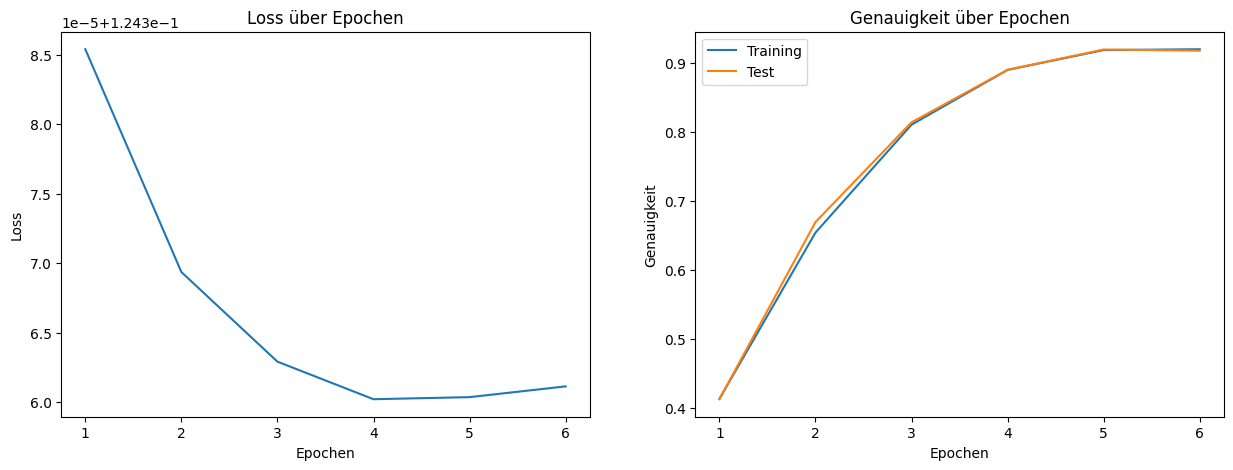

0.9172

In [15]:
slp = SingleLayerNetwork(input_size=784, hidden_size=256, output_size=1, loss_fn=focal_loss, loss_fn_grad=focal_loss_grad, acc_fn=accuracy)
slp.train(X_train, y_train_2_binary, X_test, y_test_2_binary, lr=0.0001, epochs=6, batch_size=32)
slp.summary()
slp.evaluate(X_test, y_test_2_binary)

#### Analyse der Ziffernerkennung

In diesem Abschnitt wird die Fähigkeit unseres Modells unter die Lupe genommen, wie genau es die Ziffern aus dem MNIST-Datensatz identifizieren kann. Der Output präsentiert sechs Beispiele handgeschriebener Ziffern, und neben jeder wird angezeigt, ob das Modell sie korrekt erkannt hat – gekennzeichnet durch 'correct' – oder nicht, was mit 'incorrect' vermerkt wird. Bei jeder Ausführung des Modells können unterschiedliche Ziffern angezeigt werden, und dementsprechend kann sich auch die Gesamtgenauigkeit (overall accuracy) ändern. Diese dynamische Darstellung der Ergebnisse veranschaulicht, wie das Modell mit der Variation und Unvorhersehbarkeit realer Daten umgeht, und bietet wertvolle Einsichten in seine Leistung und Zuverlässigkeit bei der Ziffernerkennung.

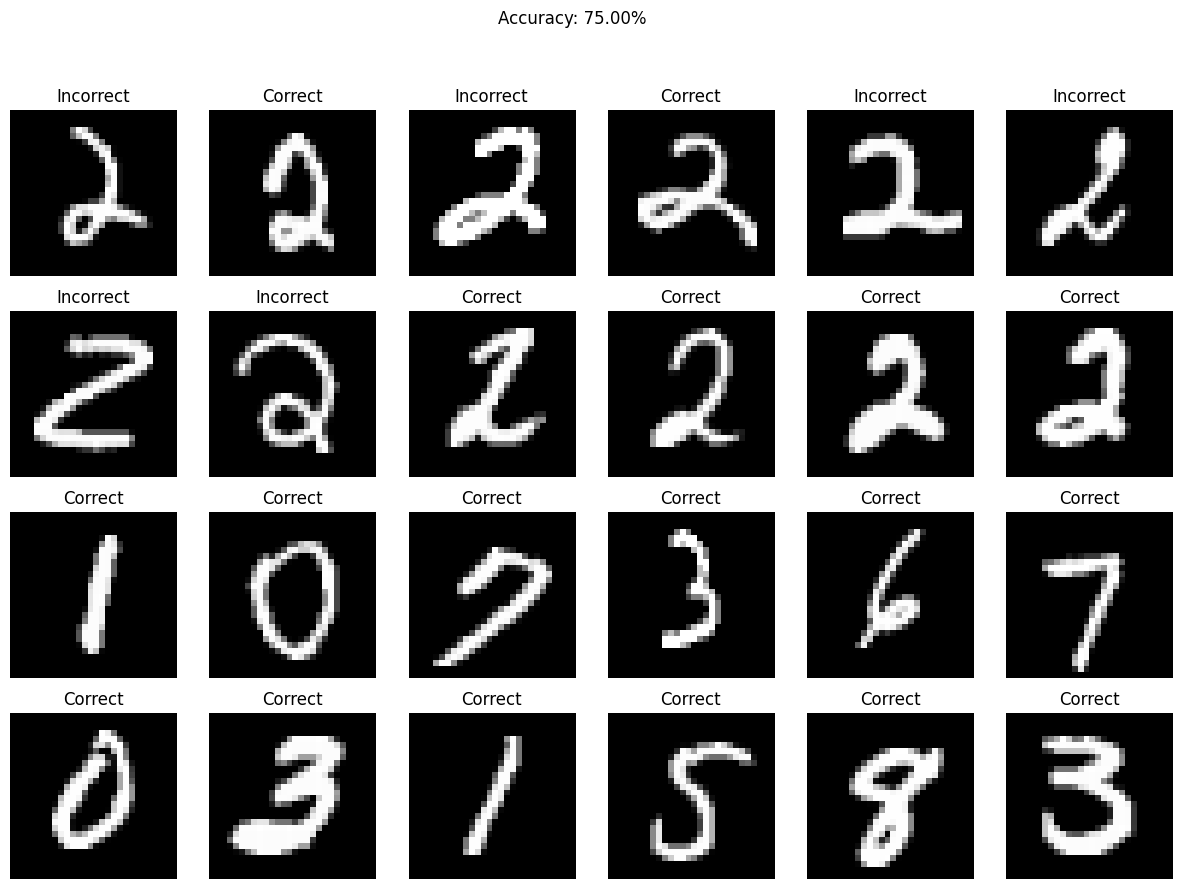

In [16]:
indices_4 = np.where(y_test == 2)[0]
indices_other = np.where(y_test != 2)[0]

indices_4_selected = np.random.choice(indices_4, 12, replace=False)
indices_other_selected = np.random.choice(indices_other, 12, replace=False)

sample_images_4 = X_test[indices_4_selected]
sample_images_other = X_test[indices_other_selected]

sample_images = np.concatenate([sample_images_4, sample_images_other], axis=0)
true_labels = np.concatenate([np.ones(12), np.zeros(12)])  # 1 für Ziffer 4, 0 für andere Ziffern

predictions = slp.predict(sample_images).flatten()

# Ermittlung der korrekten Vorhersagen
correct_predictions = ((predictions == 1) & (true_labels == 4)) | ((predictions == 0) & (true_labels != 4))

accuracy = np.mean(correct_predictions) * 100

# Visualisierung der Bilder
plt.figure(figsize=(15, 10))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    if correct_predictions[i]:
        plt.title('Correct')
    else:
        plt.title('Incorrect')
    plt.axis('off')
plt.suptitle(f'Accuracy: {accuracy:.2f}%') # Gesamte Genauigkeit
plt.show()

## Weitere Loss Funktion

Die binary cross-entropy ist eine verbreitete Loss Function für binäre Klassifikationsprobleme. Die Formel lautet:
$$
L(y_{\text{actual}}, y_{\text{predicted}}) = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right)
$$
Vorteile:
- ⁠Geeignet für binäre Klassifikation.
- ⁠Differenzierbar für Optimierung.
- ⁠Intuitive Interpretation basierend auf Wahrscheinlichkeiten.

Nachteile:
- ⁠Empfindlich bei Klasse-Ungleichgewicht.
- ⁠Anfällig für Ausreisser.
- ⁠Direkt nur für binäre Klassifikation geeignet.

## Weitere evaluations Funktion

Der F1-Score ist eine Metrik zur Bewertung der Klassifikationsleistung, die Präzision und Rückruf berücksichtigt. Die Formel lautet:
$$
F1 = 2 \times \frac{\text{Präzision} \times \text{Rückruf}}{\text{Präzision} + \text{Rückruf}}
$$

Vorteile:
- Ausgeglichenheit: Robust gegenüber ungleichen Klassenverteilungen.
- Interpretierbarkeit: Bietet eine einfache Metrik, die Präzision und Rückruf kombiniert.
- Geeignet für unbalancierte Klassen: Funktioniert gut, wenn die Klassen im Datensatz unterschiedlich häufig auftreten.

Nachteile:
- Mangel an Kontext: Berücksichtigt keine wahren negativen Vorhersagen.
- ⁠Nichtlinearität: Reagiert nicht linear auf Änderungen in Präzision oder Rückruf.
- ⁠Kompromiss zwischen Präzision und Rückruf: Hohe Werte können durch Kompromisse in Präzision oder Rückruf erreicht werden.

# Aufgabe 4

Um die bestmöglichen Einstellungen für unser neuronales Netzwerk zu ermitteln, nutzen wir ein systematisches Testverfahren, bei dem verschiedene Kombinationen von Hyperparametern angewandt werden. Dieses Verfahren ist zwar zeitaufwendig, ermöglicht uns jedoch, die optimalen Parameter für unsere Netzwerkarchitektur zu identifizieren.

Die ausgewählten Parameter für die Tests wurden aus bestehenden erfolgreichen Implementierungen für neuronale Netze mit einer Hidden Layer übernommen.

> **Wichtiger Hinweis:** Der gesamte Prozess der Hyperparameter-Suche kann sehr lange dauern. Deshalb haben wir den ausführenden Teil des Codes in Docstring gesetzt. Die besten Ergebnisse werden nachfolgend detailliert beschrieben.

In [17]:
alpha, gamma = .9, 2

def at(y):
    if alpha is None:
        return np.ones_like(y)
    return np.where(y, alpha, 1 - alpha)

def pt(y, p):
    p = np.clip(p, 1e-15, 1 - 1e-15)
    return np.where(y, p, 1 - p)

def focal_loss(y_pred, y_true):
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    return -atv * (1 - ptv) * gamma * np.log(ptv)

def focal_loss_grad(y_pred, y_true):
    y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    g = gamma
    return atv * y * (1 - ptv) ** g * (g * ptv * np.log(ptv) + ptv - 1)

In [18]:
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return x > 0

def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [19]:
def accuracy(y_pred, y_true):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return np.mean(y_pred_binary == y_true)

In [20]:
def get_batches(x, y, batch_size):
    """
    Generiert zufällige Datenbatches für das Training. Diese Funktion mischt die Daten
    und teilt sie dann in Batches der angegebenen Grösse auf.
    
    Parameters:
    x (np.array): Eingabedaten, in der Regel Features.
    y (np.array): Zieldaten, in der Regel Labels.
    batch_size (int): Die Grösse eines jeden Batches.
    
    Yields:
    tuple: Ein Tupel (x_batch, y_batch), wobei `x_batch` und `y_batch` die zufällig ausgewählten
           Batches der Eingabe- bzw. Zieldaten sind.
    """
    n_batches = len(x) // batch_size

    # Erzeugen einer zufälligen Permutation der Indizes, um die Daten zu mischen
    idx = np.random.permutation(len(x))
    x = x[idx]
    y = y[idx]
    for i in range(0, n_batches * batch_size, batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield x_batch, y_batch

In [21]:
class NetworkDevelopment:
    def __init__(self, total_epochs):
        """
        Initialisiert ein neues NetworkDevelopment-Objekt, das zum Verfolgen und Visualisieren
        von Trainingsfortschritten in neuronalen Netzwerken dient.

        Parameters:
        total_epochs (int): Die Gesamtzahl der Epochen, die während des Trainings durchlaufen werden sollen.
        """
        self.total_epochs = total_epochs
        self.losses = []
        self.accuracies_train = []
        self.accuracies_test = []

    def add_epoch(self, epoch_number, loss, acc_train, acc_test):
        self.losses.append(loss)
        self.accuracies_train.append(acc_train)
        self.accuracies_test.append(acc_test)
        return f'Epoch {epoch_number}/{self.total_epochs} - loss: {loss:.4f} - acc_train: {acc_train:.4f} - acc_test: {acc_test:.4f}'

    def plot(self):
        """
        Erzeugt ein Diagramm, das den Verlauf des Verlustes und der Genauigkeit über die Epochen darstellt.
        """
        epochs = np.arange(1, self.total_epochs + 1)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        ax1.plot(epochs, self.losses)
        ax1.set_title('Loss über Epochen')
        ax1.set_xlabel('Epochen')
        ax1.set_ylabel('Loss')
        ax2.plot(epochs, self.accuracies_train, label='Training')
        ax2.plot(epochs, self.accuracies_test, label='Test')
        ax2.set_title('Genauigkeit über Epochen')
        ax2.set_xlabel('Epochen')
        ax2.set_ylabel('Genauigkeit')
        ax2.legend()
        plt.show()

    def summary(self):
        self.plot()

In [22]:
class SingleLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, loss_fn, loss_fn_grad, acc_fn):
        """
        Initialisiert ein neuronales Netzwerk mit einer verborgenen Layer.

        Parameters:
        input_size (int): Anzahl der Eingabemerkmale.
        hidden_size (int): Anzahl der Neuronen in der verborgenen Layer.
        output_size (int): Anzahl der Neuronen in der Output Layer.
        loss_fn (function): Verlustfunktion für das Training des Netzwerks.
        loss_fn_grad (function): Gradient der Verlustfunktion.
        acc_fn (function): Funktion zur Berechnung der Genauigkeit.
        """
        self.loss_fn = loss_fn
        self.loss_fn_grad = loss_fn_grad
        self.acc_fn = acc_fn
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.hidden_layer = LinearLayer(input_size, hidden_size, relu, relu_grad)
        self.output_layer = LinearLayer(hidden_size, output_size, sigmoid, sigmoid_grad)

    def forward(self, x):
        """
        Führt eine Vorwärtsdurchlauf durch das Netzwerk aus und berechnet die Ausgabewerte.

        Parameters:
        x (np.array): Eingabedaten für das Netzwerk.

        Returns:
        np.array: Die Vorhersagen des Netzwerks.
        """
        self.x = x
        self.h = self.hidden_layer.forward(x)
        self.y_pred = self.output_layer.forward(self.h)
        return self.y_pred

    def backward(self, y_true):
        """
        Führt einen Rückwärtsdurchlauf durch das Netzwerk aus, um die Gradienten zu berechnen.

        Parameters:
        y_true (np.array): Die wahren Labels für die Eingabedaten.

        Returns:
        np.array: Der Gradient des Verlustes bezüglich der Eingabe.
        """
        y_true = y_true.reshape(-1, 1)
        self.y_pred = self.y_pred.reshape(-1, 1)
        grad_output = self.loss_fn_grad(self.y_pred, y_true)
        grad_output = self.output_layer.backward(grad_output)
        grad_output = self.hidden_layer.backward(grad_output)
        return grad_output

    def update(self, lr):
        """
        Aktualisiert die Gewichte der Layer basierend auf den berechneten Gradienten.

        Parameters:
        lr (float): Lernrate für das Gewichtsupdate.
        """
        self.hidden_layer.update(lr)
        self.output_layer.update(lr)

    def train(self, X_train, y_train, X_test, y_test, lr, epochs, batch_size, output=True):
        """
        Trainiert das Netzwerk über eine festgelegte Anzahl von Epochen.

        Parameters:
        X_train, y_train: Trainingsdaten und -labels.
        X_test, y_test: Testdaten und -labels.
        lr (float): Lernrate.
        epochs (int): Anzahl der Epochen.
        batch_size (int): Grösse der Batches.
        output (bool): Gibt an, ob der Fortschritt ausgegeben werden soll.
        """
        self.dev = NetworkDevelopment(total_epochs=epochs)
        for epoch in range(epochs):
            loss_list = []
            for x_batch, y_batch in get_batches(X_train, y_train, batch_size):
                y_pred = self.forward(x_batch)
                loss = self.loss_fn(y_pred, y_batch)
                loss_list.append(loss)
                self.backward(y_batch)
                self.update(lr)
            acc_train = self.evaluate(X_train, y_train)
            acc_test = self.evaluate(X_test, y_test)
            avg_loss = np.mean(loss_list)
            epoch_str = self.dev.add_epoch(epoch+1, avg_loss, acc_train, acc_test)
            if output:
                print(epoch_str)

    def predict(self, X):
        """
        Macht Vorhersagen für gegebene Eingabedaten.

        Parameters:
        X (np.array): Eingabedaten für Vorhersagen.

        Returns:
        np.array: Vorhersagen als binäre Klassifizierungen.
        """
        return (self.forward(X) > .5).astype(int).reshape(-1, 1)

    def evaluate(self, X, y, acc_fn=None):
        """
        Bewertet die Leistung des Netzwerks auf gegebenen Daten.

        Parameters:
        X (np.array): Die Eingabedaten.
        y (np.array): Die wahren Labels.
        acc_fn (function): Optionale benutzerdefinierte Genauigkeitsfunktion.

        Returns:
        float: Die Genauigkeit der Vorhersagen.
        """
        y_pred = self.predict(X).flatten()
        if acc_fn is not None:
            return acc_fn(y_pred, y)
        return self.acc_fn(y_pred, y)

    def summary(self):
        """
        Zeigt eine Zusammenfassung des Trainingsverlaufs.
        """
        self.dev.summary()

y_train_2_binary = (y_train == 2).astype(int)
y_test_2_binary = (y_test == 2).astype(int)

In [23]:
'''
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
hidden_layer_sizes = [256, 512]

results = {}

for lr in learning_rates:
    for hidden_size in hidden_layer_sizes:
        print(f"Training with lr={lr}, hidden_size={hidden_size}")
        slp = SingleLayerNetwork(input_size=784, hidden_size=hidden_size, output_size=1, loss_fn=focal_loss, loss_fn_grad=focal_loss_grad, acc_fn=accuracy)
        slp.train(X_train, y_train_2_binary, X_test, y_test_2_binary, lr=lr, epochs=5, batch_size=32)

        results[(lr, hidden_size)] = slp
'''

'\nlearning_rates = [0.01, 0.001, 0.0001, 0.00001]\nhidden_layer_sizes = [256, 512]\n\nresults = {}\n\nfor lr in learning_rates:\n    for hidden_size in hidden_layer_sizes:\n        print(f"Training with lr={lr}, hidden_size={hidden_size}")\n        slp = SingleLayerNetwork(input_size=784, hidden_size=hidden_size, output_size=1, loss_fn=focal_loss, loss_fn_grad=focal_loss_grad, acc_fn=accuracy)\n        slp.train(X_train, y_train_2_binary, X_test, y_test_2_binary, lr=lr, epochs=5, batch_size=32)\n\n        results[(lr, hidden_size)] = slp\n'

In unseren Experimenten zeigte sich, dass die Einstellungen `learning_rate = 0.001` und `hidden_size = 256` bzw. `512` die besten Genauigkeitswerte erzielten. Die wiederholten Tests bestätigen, dass eine Erhöhung der Grösse der hidden layer und niedrigere learning rate (als in der Aufgabenstellung) notwendig ist, um effektives Lernen und hohe Genauigkeit zu gewährleisten. Die in der Aufgabenstellung vorgeschlagenen Grössen folgen der Formel für $2^n$, was unsere Ergebnisse mit den grösseren layer unterstützt.

```
Training with lr=0.01, hidden_size=256
Epoch 1/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 2/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 3/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 4/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 5/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Training with lr=0.01, hidden_size=512
Epoch 1/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 2/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 3/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 4/5 - loss: 0.1244 - acc_train: 0.0993 - acc_test: 0.1032
Epoch 5/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Training with lr=0.001, hidden_size=256
Epoch 1/5 - loss: 0.1244 - acc_train: 0.9112 - acc_test: 0.9075
Epoch 2/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 3/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 4/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 5/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Training with lr=0.001, hidden_size=512
Epoch 1/5 - loss: 0.1243 - acc_train: 0.9316 - acc_test: 0.9287
Epoch 2/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 3/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 4/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Epoch 5/5 - loss: 0.1244 - acc_train: 0.9007 - acc_test: 0.8968
Training with lr=0.0001, hidden_size=256
Epoch 1/5 - loss: 0.1244 - acc_train: 0.7484 - acc_test: 0.7511
Epoch 2/5 - loss: 0.1244 - acc_train: 0.7373 - acc_test: 0.7409
Epoch 3/5 - loss: 0.1244 - acc_train: 0.7626 - acc_test: 0.7682
Epoch 4/5 - loss: 0.1243 - acc_train: 0.8094 - acc_test: 0.8167
Epoch 5/5 - loss: 0.1244 - acc_train: 0.8621 - acc_test: 0.8711
Training with lr=0.0001, hidden_size=512
Epoch 1/5 - loss: 0.1244 - acc_train: 0.5855 - acc_test: 0.5704
Epoch 2/5 - loss: 0.1244 - acc_train: 0.6415 - acc_test: 0.6303
Epoch 3/5 - loss: 0.1243 - acc_train: 0.7098 - acc_test: 0.7062
Epoch 4/5 - loss: 0.1243 - acc_train: 0.7681 - acc_test: 0.7649
Epoch 5/5 - loss: 0.1243 - acc_train: 0.8174 - acc_test: 0.8159
Training with lr=1e-05, hidden_size=256
Epoch 1/5 - loss: 0.1244 - acc_train: 0.7207 - acc_test: 0.7098
Epoch 2/5 - loss: 0.1244 - acc_train: 0.7210 - acc_test: 0.7119
Epoch 3/5 - loss: 0.1244 - acc_train: 0.7226 - acc_test: 0.7152
Epoch 4/5 - loss: 0.1244 - acc_train: 0.7251 - acc_test: 0.7194
Epoch 5/5 - loss: 0.1244 - acc_train: 0.7271 - acc_test: 0.7224
Training with lr=1e-05, hidden_size=512
Epoch 1/5 - loss: 0.1244 - acc_train: 0.1374 - acc_test: 0.1389
Epoch 2/5 - loss: 0.1244 - acc_train: 0.1420 - acc_test: 0.1423
Epoch 3/5 - loss: 0.1244 - acc_train: 0.1473 - acc_test: 0.1473
Epoch 4/5 - loss: 0.1244 - acc_train: 0.1537 - acc_test: 0.1530
Epoch 5/5 - loss: 0.1244 - acc_train: 0.1604 - acc_test: 0.1591
```

# Aufgabe 5

### Softmax

Die Softmax-Funktion ist ein entscheidender Bestandteil vieler neuronaler Netzwerke, speziell in den Output Layer von Klassifizierungsnetzwerken. Sie wird verwendet, um einen Vektor von reellen Zahlen in eine Verteilung von Wahrscheinlichkeiten zu konvertieren, wobei die Summe aller Wahrscheinlichkeiten gleich 1 ist.

### Funktionsweise

Angenommen, wir haben einen Vektor $z$ mit den reellen Zahlen $z_1, z_2, ..., z_n`$. Die Softmax-Funktion berechnet dann die Wahrscheinlichkeit jedes dieser Werte `z_i` wie folgt:

$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

Dabei gilt:

- $e$ ist die Basis des natürlichen Logarithmus.
- $e^{z_i}$ ist der Exponent von $z_i$.
- Der Nenner $\sum_{j=1}^{n} e^{z_j}$ ist die Summe aller exponentierten Werte des Vektors $z$.

Die Softmax-Funktion verstärkt die grösseren Zahlen in $z$, indem sie relativ grösser gemacht werden, während die kleineren Zahlen relativ kleiner gemacht werden. Dies fördert den Kontrast zwischen den Werten, was bei der Klassifizierung von Daten nützlich ist. Nach der Anwendung von Softmax kann der Index des höchsten Wertes als Vorhersage der Klassenzugehörigkeit angesehen werden.

### Vorteile

- **Wahrscheinlichkeitsverteilung**: Softmax konvertiert Scores in eine Wahrscheinlichkeitsverteilung, was intuitiv und nützlich für die Klassifizierung ist.
  
- **Differenzierbar**: Die Funktion ist überall differenzierbar. Dies ermöglicht es, sie in Backpropagation und Gradientenabstieg zu verwenden.

- **Multiklassen-Klassifizierung**: Besonders geeignet für Probleme mit mehreren Klassen, da sie Wahrscheinlichkeiten liefert, die sich zu 1 aufsummieren.

- **Stabilisierung von Gradienten**: Durch Verstärkung der Unterschiede in den Eingabewerten hilft sie, das Verschwinden oder Explodieren von Gradienten zu vermeiden.

### Nachteile

- **Berechnungsaufwendig**: Die Exponentialfunktion kann rechenintensiv sein, was besonders bei tiefen Netzwerken und grossen Datensätzen ins Gewicht fällt.

- **Numerische Stabilität**: Direkte Berechnung kann zu numerischen Instabilitäten führen. Daher werden in der Praxis oft Tricks angewendet, um dies zu verhindern, wie das Subtrahieren des Maximalwerts vor der Exponentialfunktion.

- **Ausreisser-Empfindlichkeit**: Sehr grosse Eingabewerte können die Softmax-Ausgaben dominieren, was zu einer Empfindlichkeit gegenüber Ausreissern führt.

- **Eindimensionale Interpretation**: Softmax behandelt jede Klasse unabhängig von den anderen, was bedeuten kann, dass sie keine multilabelabhängigen Wahrscheinlichkeiten berücksichtigt.


In [24]:
def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True)
    x = np.exp(x)
    x = x / np.sum(x, axis=1, keepdims=True)
    return x

def softmax_grad(x):
    return softmax(x) * (1 - softmax(x))

### Cross-Entropy
$$
 L = -\frac{1}{N} \sum_{i=1}^N y_i \log(\hat{y}_i)
$$

Die Kreuzentropie ist eine weit verbreitete Verlustfunktion für Klassifizierungsprobleme mit mehreren Klassen. Sie misst, wie gut die vorhergesagten Wahrscheinlichkeitsverteilungen der tatsächlichen Verteilung entsprechen. Ein idealer Wert der Kreuzentropie ist 0, was bedeutet, dass die vorhergesagten Wahrscheinlichkeiten perfekt mit den tatsächlichen Klassen übereinstimmen.

Die Funktion fokussiert sich nur auf die Wahrscheinlichkeit der tatsächlich wahren Klasse. Wenn die wahre Klasse korrekt mit hoher Wahrscheinlichkeit vorhergesagt wird, ist der Beitrag zum Verlust gering; ist die Vorhersage jedoch falsch, steigt der Verlust deutlich. Ein Beispiel hierfür wäre:

$$
\begin{aligned}
& L = -\log(0.1) \approx 2.303,
\end{aligned}
$$
wenn die Wahrscheinlichkeit der wahren Klasse nur 0.1 beträgt, was zu einem hohen Verlust führt.

#### Vorteile der Cross-Entropy Loss Funktion:
1. **Klare Wahrscheinlichkeitsinterpretation**: Diese Funktion ist effektiv, weil sie direkt die Übereinstimmung zwischen den prognostizierten und den tatsächlichen Wahrscheinlichkeiten bewertet.
2. **Effizientes Lernen**: Sie fördert schnelleres Lernen besonders, wenn sie mit der Softmax-Aktivierung in den letzten Layer eines neuronalen Netzes kombiniert wird.
3. **Automatische Anpassung der Lernrate**: Die Kreuzentropie kann als ein Mechanismus betrachtet werden, der die Lernrate automatisch anpasst, je nachdem, wie falsch die Vorhersage ist.

$$
H(y, \hat{y}) = -\sum_{i=1}^N y_i \log(\hat{y}_i)
$$

#### Nachteile der Cross-Entropy Loss Funktion:
1. **Nicht für Regression geeignet**: Für Aufgaben, bei denen kontinuierliche statt kategorischer Ausgaben gefordert sind, ist diese Funktion nicht passend.
2. **Mögliches numerisches Problem**: Die Logarithmusfunktion in der Kreuzentropie kann zu numerischen Problemen führen, besonders wenn eine vorhergesagte Wahrscheinlichkeit nahe bei Null liegt.
3. **Vorbedingung der Wahrscheinlichkeitsverteilung**: Die Funktion setzt voraus, dass die Ausgaben des Modells gültige Wahrscheinlichkeitsverteilungen sind, was die Notwendigkeit von Aktivierungsfunktionen wie Softmax erfordert.

Der Gradient der Kreuzentropie-Verlustfunktion wird häufig im Kontext der Softmax-Funktion diskutiert, weil die Ableitung der Kreuzentropie nach den Eingaben der Softmax-Layer lediglich die Differenz zwischen der vorhergesagten und der tatsächlichen Klasse darstellt:

$$
\frac{\partial L}{\partial z_{j}} = \hat{y}_i - y_i
$$

Dies erleichtert die Anwendung von Optimierungsmethoden wie dem Gradientenabstieg, da die nötigen Anpassungen direkt durch die Differenz zwischen der Vorhersage und der Wahrheit bestimmt werden.

In [25]:
def cross_entropy(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps)
    loss = -(y_true * np.log(y_pred)).sum(axis=1).mean()
    return loss

def cross_entropy_grad(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps)
    grad = y_pred - y_true
    return grad

### One-Hot-Encoding

One-Hot-Encoding ist eine Technik, um kategoriale Daten numerisch darzustellen. Im Kontext von Datensätzen wie MNIST, bei denen jede Bildaufnahme einer von zehn Ziffern (0 bis 9) zugeordnet ist, wandelt diese Methode jede Ziffer in einen binären Vektor um. Dieser Vektor hat die Länge 10, und jedes Element entspricht einer der möglichen Ziffern. Beispielsweise repräsentiert der Vektor [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] die Ziffer 3, indem ausschliesslich das vierte Element auf 1 gesetzt wird, während alle anderen Elemente 0 bleiben.

Die Transformation in den One-Hot-Vektor erfolgt wie folgt:

$$
\text{y\_one\_hot}[i, \text{y}[i]] = 1
$$

Hierbei ist $\text{y\_one\_hot}$ eine Matrix mit den Dimensionen $\text{len(y)} \times 10$, die anfänglich mit Nullen gefüllt ist.

### Genauigkeitsfunktion (Accuracy)

Die Genauigkeitsfunktion, oder auch Accuracy, ist ein Massstab zur Bewertung der Leistung eines Klassifikators. Sie berechnet den Anteil der korrekten Vorhersagen an allen getätigten Vorhersagen und ist besonders relevant für Aufgaben wie die Klassifikation von MNIST-Ziffern. Die Genauigkeit wird ermittelt, indem man die Anzahl der korrekten Vorhersagen durch die Gesamtzahl der Vorhersagen teilt. Dies ergibt einen Wert zwischen 0 und 1:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekten Vorhersagen}}{\text{Gesamtzahl der Vorhersagen}} = \frac{1}{N} \sum_{i=1}^{N} I(y_{\text{true}_i} = y_{\text{pred}_i})
$$

Dabei steht $I$ für die Indikatorfunktion, die 1 ergibt, wenn die vorhergesagte und die tatsächliche Klasse übereinstimmen, und 0, wenn dies nicht der Fall ist. Diese Metrik ist einfach zu verstehen und gibt direkt Auskunft über die Effektivität eines Klassifikators auf einem Datensatz, bei dem jede Klasse gleichmässig vertreten ist.

Im Vergleich zu komplexeren Metriken wie Präzision, Recall oder dem F1-Score, welche oft in Szenarien mit unausgewogenen Datensätzen nützlich sind, bietet die Genauigkeit eine direkte und unkomplizierte Einsicht in die Leistung bei ausgeglichenen Klassenzusammensetzungen.


In [26]:
def acc(y_pred, y_true):
    return np.mean(y_pred == y_true)
def one_hot_encode(y):
    y_one_hot = np.zeros((len(y), 10))
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot

y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

### Multi-Layer Network

Die Klasse `MultiLayerNetwork` repräsentiert ein ausgeklügeltes, multi-layer neuronales Netzwerk, das speziell für das Training und die Bewertung mit bestimmten Datensätzen konzipiert wurde. Diese Klasse ist mit einer Vielzahl von Methoden ausgestattet, die sowohl die Vorwärts- als auch die Rückwärtspropagation durchführen können, um Vorhersagen zu generieren und das Modell kontinuierlich zu optimieren.

Beim Initialisieren durch den Konstruktor `__init__` werden wichtige Parameter wie die Eingabegrösse, die Grössen der drei Hidden Layer und die Ausgabegrösse festgelegt. Zusätzlich werden Funktionen für die Verlustberechnung und deren Gradient sowie eine Genauigkeitsfunktion für die Bewertung der Modellleistung definiert. Diese Initialisierung bereitet das Netzwerk darauf vor, mit den erforderlichen Layer und Parametern zu arbeiten.

Die Methode `forward(x)` ist zentral für die Operation des Netzwerks. Sie führt die Vorwärtspropagation durch und berechnet die Ausgabe des Netzwerks für die gegebene Eingabe `x`. Im Gegenzug kümmert sich die Methode `backward(x, y_true)` um die Rückwärtspropagation, indem sie die Gradienten der Gewichte und Bias basierend auf dem tatsächlichen Ausgang `y_true` berechnet, allerdings ohne eine Rückgabe, da sie lediglich interne Zustände aktualisiert.

Ein weiterer wichtiger Aspekt ist das Aktualisieren der Netzwerkparameter durch die Methode `update()`, die die während der Rückwärtspropagation berechneten Gradienten verwendet, um die Gewichte und Bias des Netzwerks anzupassen.

Das Training des Netzwerks wird durch die Methode `train(X_train, y_train, learning_rate, epochs, batch_size)` realisiert, bei der das Netzwerk mit Trainingsdaten über mehrere Epochen und unter Verwendung spezifischer Parameter für Lernrate und Batchgrösse trainiert wird. Die Ergebnisse dieses Prozesses werden in einem `NetworkDevelopment`-Objekt festgehalten, das die Fortschritte dokumentiert.

Die Methode `predict(X)` ist dafür verantwortlich, die vorhergesagten Klassen für die Eingabedaten `X` zu liefern, basierend auf den aktuellen Parametern des Netzwerks. Zur Bewertung der Genauigkeit dieser Vorhersagen dient die Methode `evaluate(X, y)`, die einen Genauigkeitswert zurückgibt, der angibt, wie gut die Vorhersagen mit den wahren Klassen übereinstimmen.

Schliesslich bietet die `summary()`` Methode eine detaillierte Übersicht über die Trainings- und Validierungsergebnisse. Sie zeigt die Genauigkeit und den Verlust für jede Epoche an und gibt einen Überblick über die durchschnittlichen Verbesserungen während des Trainingsprozesses. Diese Zusammenfassung ist ein wesentliches Werkzeug für die Analyse der Leistung des Netzwerks.

In [27]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, loss_fn, loss_fn_grad, acc_fn):
        """
        Initialisiert ein neues NeuralNetwork-Objekt mit den gegebenen Parametern.

        Parameters:
            input_size (int): Anzahl der Eingabeneuronen.
            hidden_size (int): Anzahl der Neuronen in jeder Hidden Layer.
            output_size (int): Anzahl der Ausgabeneuronen.
            loss_fn (function): Verlustfunktion.
            loss_fn_grad (function): Funktion zur Berechnung des Verlustgradienten.
            acc_fn (function): Funktion zur Berechnung der Genauigkeit.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.loss_fn = loss_fn
        self.loss_fn_grad = loss_fn_grad
        self.acc_fn = acc_fn

        self.hidden_layer1 = LinearLayer(input_size, hidden_size, relu, relu_grad)
        self.hidden_layer2 = LinearLayer(hidden_size, hidden_size, relu, relu_grad)
        self.hidden_layer3 = LinearLayer(hidden_size, hidden_size, relu, relu_grad)
        self.output_layer = LinearLayer(hidden_size, output_size, softmax, softmax_grad)

        self.dev = None
        self.hidden_output1 = None
        self.hidden_output2 = None
        self.hidden_output3 = None
        self.predicted_output = None

    def forward(self, x):
        """
        Führt die Vorwärtspropagation durch das Netzwerk aus.

        Parameters:
            x (array): Eingabedaten für das Netzwerk.

        Returns:
            array: Die Ausgabe des Netzwerks nach der Vorwärtspropagation.
        """
        self.hidden_output1 = self.hidden_layer1.forward(x)
        self.hidden_output2 = self.hidden_layer2.forward(self.hidden_output1)
        self.hidden_output3 = self.hidden_layer3.forward(self.hidden_output2)
        self.predicted_output = self.output_layer.forward(self.hidden_output3)
        return self.predicted_output

    def backward(self, y_true):
        """
        Führt die Rückwärtspropagation durch das Netzwerk aus, basierend auf den tatsächlichen Werten.

        Parameters:
            y_true (array): Tatsächliche Klassen/Werte, gegen die trainiert wird.

        Returns:
            array: Der Gradient der Eingabe der ersten Layer nach Rückwärtspropagation.
        """
        gradient_output = self.loss_fn_grad(self.predicted_output, y_true)

        gradient_output = self.output_layer.backward(gradient_output, self.predicted_output)
        gradient_output = self.hidden_layer3.backward(gradient_output, self.hidden_output3)
        gradient_output = self.hidden_layer2.backward(gradient_output, self.hidden_output2)
        gradient_output = self.hidden_layer1.backward(gradient_output, self.hidden_output1)

        return gradient_output

    def update(self, learning_rate):
        """
        Aktualisiert die Gewichte und Bias aller Layer basierend auf den Gradienten.

        Parameters:
            learning_rate (float):
            Aktualisiert die Gewichte und Bias aller Layer basierend auf den gespeicherten Gradienten.

        Parameters:
            learning_rate (float): Lernrate für die Gewichtsaktualisierung.
        """
        self.hidden_layer1.update(learning_rate)
        self.hidden_layer2.update(learning_rate)
        self.hidden_layer3.update(learning_rate)
        self.output_layer.update(learning_rate)

    def train(self, X_train, y_train, X_test, y_test, learning_rate, epochs, batch_size, output=True):
        """
        Trainiert das neuronale Netzwerk mit gegebenen Trainings- und Testdaten.

        Parameters:
            X_train (array): Trainingsdaten.
            y_train (array): Trainingszielwerte.
            X_test (array): Testdaten.
            y_test (array): Testzielwerte.
            learning_rate (float): Lernrate für die Gewichtsaktualisierung.
            epochs (int): Anzahl der Trainingsepochen.
            batch_size (int): Grösse der Batches für das Training.
            output (bool): Bestimmt, ob Trainingsfortschritte ausgegeben werden sollen.
        """
        self.dev = NetworkDevelopment(total_epochs=epochs)

        for epoch in range(epochs):
            loss_list = []
            for X_batch, y_batch in get_batches(X_train, y_train, batch_size):
                predicted_output = self.forward(X_batch)

                loss = self.loss_fn(predicted_output, y_batch)
                loss_list.append(loss)

                self.backward(y_batch)
                self.update(learning_rate)

            avg_loss = np.mean(loss_list)
            acc_train = self.evaluate(X_train, y_train)
            acc_test = self.evaluate(X_test, y_test)

            epoch_str = self.dev.add_epoch(epoch+1, avg_loss, acc_train, acc_test)
            if output:
                print(epoch_str)

    def evaluate(self, X, y):
        """
        Bewertet das neuronale Netzwerk basierend auf der Genauigkeit der Vorhersage gegenüber den tatsächlichen Klassen.

        Parameters:
            X (array): Eingabedaten für die Bewertung.
            y (array): Tatsächliche Zielklassen.

        Returns:
            float: Genauigkeit der Vorhersagen.
        """
        predicted_classes = self.predict(X)
        true_classes = np.argmax(y, axis=1)
        return self.acc_fn(predicted_classes, true_classes)
    def predict(self, X):
        """
        Erzeugt Vorhersagen für gegebene Eingabedaten.

        Parameters:
            X (array): Daten, für die Vorhersagen gemacht werden sollen.

        Returns:
            array: Vorhergesagte Klassenindizes.
        """
        predicted_output = self.forward(X)
        return np.argmax(predicted_output, axis=1)

    def summary(self):
        """
        Gibt eine Zusammenfassung der Trainings- und Validierungsergebnisse aus.
        """
        self.dev.summary()

## Auswertung des Trainingsoutputs eines Neuronalen Netzwerks

Der vorliegende Output zeigt die Ergebnisse des Trainingsprozesses eines neuronalen Netzwerks über einen Zeitraum von 6 Epochen.

### Trainingslog

Im Textteil des Outputs finden wir eine detaillierte Aufstellung der Trainingsergebnisse pro Epoche, die uns folgendes vermitteln:

- Der Verlustwert (`loss`) verringert sich mit jeder Epoche. Zu Beginn liegt er bei 2.3009 und fällt bis zur sechsten Epoche auf 0.1339 ab. Diese Abnahme des Verlustes ist ein Indikator dafür, dass das Netzwerk mit jeder Iteration besser darin wird, die Trainingsdaten zu repräsentieren und die Fehler zu minimieren.

- Die Genauigkeit auf den Trainingsdaten (`acc_train`) und auf den Testdaten (`acc_test`) nimmt mit jeder Epoche zu. Anfangs sind die Genauigkeiten recht niedrig (0.1124 für Trainings- und 0.1135 für Testdaten), steigen aber kontinuierlich an und erreichen schliesslich Werte von 0.9654 (Training) und 0.9584 (Test), was zeigt, dass das Modell zunehmend präzisere Vorhersagen trifft.

### Graphische Darstellung

Die Graphen bieten eine visuelle Repräsentation der Leistung des Netzwerks über die Zeit:

#### Verlust über Epochen (Linker Graph)

- Der Graph fällt steil ab, was auf eine schnelle und signifikante Verbesserung des Modells hinweist, insbesondere in den frühen Phasen des Trainings.
- Die kontinuierliche Abnahme zeigt, dass das Modell konsequent von den Daten lernt und seine Vorhersagen präzisiert.

#### Genauigkeit über Epochen (Rechter Graph)

- Der Anstieg der Genauigkeit sowohl für Trainings- als auch Testdaten demonstriert, dass das Modell besser wird, die zugrundeliegenden Muster in den Daten zu erfassen.
- Die Kurven der Genauigkeit flachen zum Ende hin ab, was auf eine Annäherung an die maximale Lernkapazität des Modells für den gegebenen Datensatz und die Netzwerkarchitektur hindeuten könnte.
- Die Nähe der beiden Kurven zueinander lässt auf eine gute Generalisierung schliessen. Es gibt keinen grossen Unterschied zwischen der Genauigkeit des Trainings- und des Testsatzes, was bedeuten könnte, dass das Modell nicht übermässig an die Trainingsdaten angepasst ist (Overfitting).

Epoch 1/6 - loss: 2.3011 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/6 - loss: 1.8757 - acc_train: 0.6297 - acc_test: 0.6298
Epoch 3/6 - loss: 0.4852 - acc_train: 0.9206 - acc_test: 0.9212
Epoch 4/6 - loss: 0.2607 - acc_train: 0.9445 - acc_test: 0.9398
Epoch 5/6 - loss: 0.1876 - acc_train: 0.9619 - acc_test: 0.9551
Epoch 6/6 - loss: 0.1434 - acc_train: 0.9673 - acc_test: 0.9595


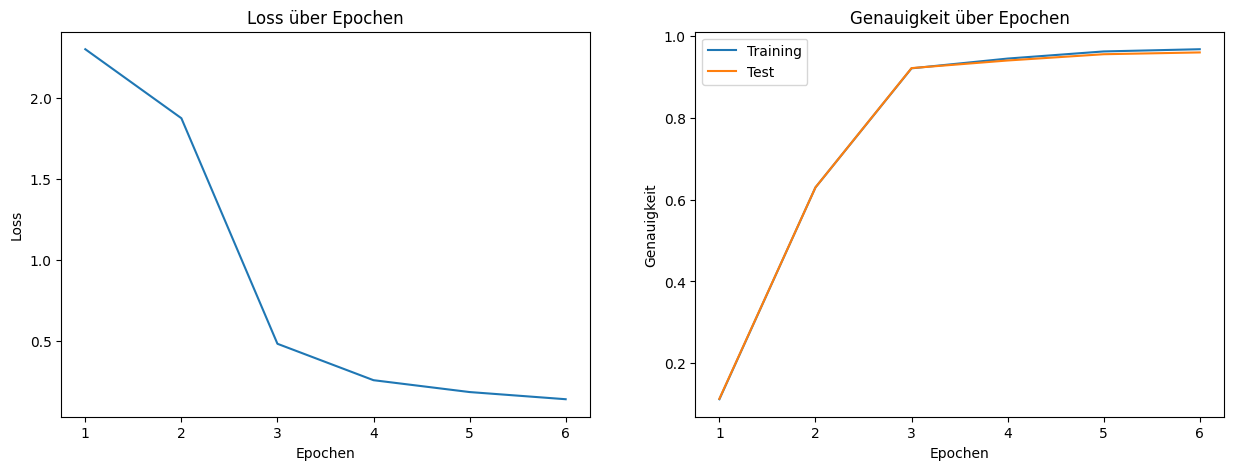

0.9595

In [28]:
mln = NeuralNetwork(input_size=784, hidden_size=256, output_size=10, loss_fn=cross_entropy, loss_fn_grad=cross_entropy_grad, acc_fn=acc)
mln.train(X_train, y_train_one_hot, X_test, y_test_one_hot, learning_rate=0.01, epochs=6, batch_size=64)
mln.summary()
mln.evaluate(X_test, y_test_one_hot)

### Erkennung der Ziffer

1. **Bildauswahl**
   Ein Bild wird zufällig aus dem Testdatensatz ausgewählt, wobei `np.random.randint` verwendet wird, um einen zufälligen Index zu generieren.

2. **Bildanzeige**
   Das ausgewählte Bild wird mit `matplotlib` angezeigt. Es ist ein 28x28 Pixel grosses Bild in Graustufen (`cmap='gray'`). Das Bild zeigt eine Ziffer, was dem wahren Wert (`True Label`) entspricht.

3. **Vorhersage durch das neuronale Netzwerk**
   Das Modell berechnet die Wahrscheinlichkeiten für jede Klasse (0 bis 9). Je nachdem, ob das Modell einer bestimmten Klasse angehört (`mln` oder `slp`), wird die Methode für die Vorwärtspropagierung aufgerufen, um diese Wahrscheinlichkeiten zu ermitteln.

4. **Ergebnisausgabe**
   Die Wahrscheinlichkeiten für jede Ziffer werden ausgegeben. Das Netzwerk sagt mit hoher Wahrscheinlichkeit die Ziffer `x` voraus, was mit dem tatsächlichen Wert übereinstimmt.

5. **Endgültige Klassifizierung**
   Das Modell wählt die Klasse mit der höchsten Wahrscheinlichkeit als vorhergesagte Ziffer (`Predicted Label`) aus.

Diese Vorgehensweise illustriert nicht nur, wie das Netzwerk seine Vorhersagen trifft, sondern gibt auch Aufschluss über das Vertrauen, das es in seine eigene Klassifizierung hat.

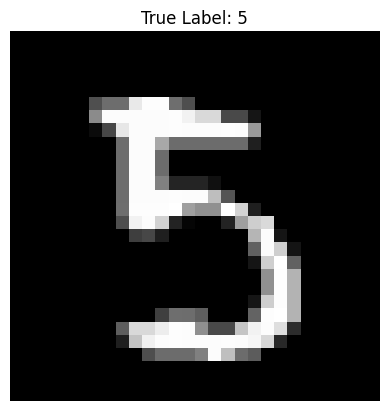

Probability for label 0: 0.0000
Probability for label 1: 0.0000
Probability for label 2: 0.0000
Probability for label 3: 0.0004
Probability for label 4: 0.0000
Probability for label 5: 0.9996
Probability for label 6: 0.0000
Probability for label 7: 0.0000
Probability for label 8: 0.0000
Probability for label 9: 0.0000
Predicted Label: 5


In [29]:
index = np.random.randint(0, len(X_test) - 1)
image = X_test[index]
true_label = y_test[index]

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f'True Label: {true_label}')
plt.show()

if isinstance(mln, NeuralNetwork):
    """
    Berechnet die Wahrscheinlichkeiten der Label-Vorhersage für ein einzelnes Bild mithilfe des
    neuronalen Netzwerks 'mln'.
    
    Args:
    image (np.array): Ein einzelnes Bild in abgeflachter Form (flattened form).

    Returns:
    np.array: Ein Array mit Wahrscheinlichkeiten für jeden möglichen Label.
    """
    probabilities = mln.forward(image.reshape(1, -1))[0]
else:
    """
    Berechnet die Wahrscheinlichkeiten der Label-Vorhersage für ein einzelnes Bild mithilfe des
    Single Layer Perceptrons 'slp'.
    
    Args:
    image (np.array): Ein einzelnes Bild in abgeflachter Form.

    Returns:
    np.array: Ein Array mit Wahrscheinlichkeiten für jeden möglichen Label.
    """
    probabilities = slp.forward(image.reshape(1, -1))[0]

for i, prob in enumerate(probabilities):
    print(f'Probability for label {i}: {prob:.4f}')

predicted_label = np.argmax(probabilities)
print(f'Predicted Label: {predicted_label}')

## Hyperparameter-Optimierung für ein Neuronales Netzwerk

### Code-Übersicht

- **Hyperparameter**: Zwei wichtige Hyperparameter werden variiert: `learning_rates` und `hidden_layer_sizes`. Die Lernraten variieren logarithmisch von 0.1 bis 0.00001, während die Grösse der Hidden Layer von 4 bis 512 Neuronen variiert.
- **Verschachtelte Schleifen**: Um die beste Kombination zu finden, iteriert der Code durch jede Lernrate und Grösse der Hidden Layer, trainiert das Netzwerk und speichert die Ergebnisse.
- **Modelltraining**: Jedes Modell wird mit den spezifizierten Hyperparametern trainiert, und die Trainingsfortschritte werden über 5 Epochen hinweg verfolgt.
- **Ergebnisspeicherung**: Die Performance-Metriken jedes Modells werden in einem Dictionary `results` gespeichert, wobei der Schlüssel die Hyperparameter und der Wert das trainierte Modell ist.

### Output-Analyse

- **Trainingslogs**: Für jede Kombination von Hyperparametern werden der Verlust (`loss`) und die Genauigkeit (`acc_train` und `acc_test`) für jede Trainings-Epoche ausgegeben.
- **Leistungsunterschiede**: Einige Modelle zeigen eine durchgängig niedrige Genauigkeit, was auf eine unzureichende Lernrate oder Netzwerkkapazität hinweisen könnte. Andere zeigen eine deutliche Verbesserung über die Epochen, was eine bessere Einstellung der Hyperparameter nahelegt.

In dem gezeigten Output lässt sich erkennen, dass die besten Ergebnisse bei den Lernraten von 0.1 und 0.01 erzielt werden, insbesondere in Kombination mit den gröseren Hidden Layers, die 256 und 512 Neuronen enthalten. Diese Konfigurationen führen zu einer deutlichen Steigerung der Genauigkeit des neuronalen Netzwerks, was darauf hindeutet, dass das Modell mit diesen Einstellungen besser in der Lage ist, aus den Daten zu lernen und präzise Vorhersagen zu treffen. Es zeigt sich, dass eine sorgfältige Abstimmung der Hyperparameter – speziell der Lernrate und der Grösse der Hidden Layer – wesentlich ist, um die Leistungsfähigkeit eines neuronalen Netzwerks zu maximieren.


In [30]:
'''
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
hidden_layer_sizes = [4, 8, 16, 256, 512]

results = {}

for lr in learning_rates:
    for hidden_size in hidden_layer_sizes:
        print(f"Training with lr={lr}, hidden_size={hidden_size}")
        mlp = NeuralNetwork(input_size=784, hidden_size=hidden_size, output_size=10, loss_fn=cross_entropy, loss_fn_grad=cross_entropy_grad, acc_fn=acc)
        mlp.train(X_train, y_train_one_hot, X_test, y_test_one_hot, learning_rate=lr, epochs=5, batch_size=32)
        
        results[(lr, hidden_size)] = mlp
'''

'\nlearning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]\nhidden_layer_sizes = [4, 8, 16, 256, 512]\n\nresults = {}\n\nfor lr in learning_rates:\n    for hidden_size in hidden_layer_sizes:\n        print(f"Training with lr={lr}, hidden_size={hidden_size}")\n        mlp = NeuralNetwork(input_size=784, hidden_size=hidden_size, output_size=10, loss_fn=cross_entropy, loss_fn_grad=cross_entropy_grad, acc_fn=acc)\n        mlp.train(X_train, y_train_one_hot, X_test, y_test_one_hot, learning_rate=lr, epochs=5, batch_size=32)\n        \n        results[(lr, hidden_size)] = mlp\n'

```
Training with lr=0.1, hidden_size=4
Epoch 1/5 - loss: 2.3031 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3034 - acc_train: 0.0986 - acc_test: 0.0958
Epoch 3/5 - loss: 2.3032 - acc_train: 0.0986 - acc_test: 0.0958
Epoch 4/5 - loss: 2.3032 - acc_train: 0.0993 - acc_test: 0.1032
Epoch 5/5 - loss: 2.3034 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.1, hidden_size=8
Epoch 1/5 - loss: 2.3030 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3031 - acc_train: 0.1044 - acc_test: 0.1028
Epoch 3/5 - loss: 2.3031 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3034 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3031 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.1, hidden_size=16
Epoch 1/5 - loss: 2.3030 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3034 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3033 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3034 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3035 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.1, hidden_size=256
Epoch 1/5 - loss: 0.7890 - acc_train: 0.9520 - acc_test: 0.9484
Epoch 2/5 - loss: 0.1457 - acc_train: 0.9697 - acc_test: 0.9645
Epoch 3/5 - loss: 0.1000 - acc_train: 0.9800 - acc_test: 0.9719
Epoch 4/5 - loss: 0.0766 - acc_train: 0.9830 - acc_test: 0.9721
Epoch 5/5 - loss: 0.0626 - acc_train: 0.9870 - acc_test: 0.9740
Training with lr=0.1, hidden_size=512
Epoch 1/5 - loss: 0.5616 - acc_train: 0.9627 - acc_test: 0.9586
Epoch 2/5 - loss: 0.1269 - acc_train: 0.9749 - acc_test: 0.9678
Epoch 3/5 - loss: 0.0874 - acc_train: 0.9841 - acc_test: 0.9750
Epoch 4/5 - loss: 0.0691 - acc_train: 0.9855 - acc_test: 0.9731
Epoch 5/5 - loss: 0.0523 - acc_train: 0.9878 - acc_test: 0.9762
Training with lr=0.01, hidden_size=4
Epoch 1/5 - loss: 2.3015 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3015 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.01, hidden_size=8
Epoch 1/5 - loss: 2.3015 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3013 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.01, hidden_size=16
Epoch 1/5 - loss: 2.3015 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.01, hidden_size=256
Epoch 1/5 - loss: 2.3010 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 1.9070 - acc_train: 0.7345 - acc_test: 0.7392
Epoch 3/5 - loss: 0.4669 - acc_train: 0.9166 - acc_test: 0.9170
Epoch 4/5 - loss: 0.2423 - acc_train: 0.9460 - acc_test: 0.9421
Epoch 5/5 - loss: 0.1704 - acc_train: 0.9656 - acc_test: 0.9559
Training with lr=0.01, hidden_size=512
Epoch 1/5 - loss: 2.1564 - acc_train: 0.5603 - acc_test: 0.5680
Epoch 2/5 - loss: 0.5617 - acc_train: 0.9053 - acc_test: 0.9021
Epoch 3/5 - loss: 0.2365 - acc_train: 0.9374 - acc_test: 0.9336
Epoch 4/5 - loss: 0.1571 - acc_train: 0.9573 - acc_test: 0.9482
Epoch 5/5 - loss: 0.1198 - acc_train: 0.9695 - acc_test: 0.9614
Training with lr=0.001, hidden_size=4
Epoch 1/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3015 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3013 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3012 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3012 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.001, hidden_size=8
Epoch 1/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3015 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3013 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3012 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3012 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.001, hidden_size=16
Epoch 1/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3015 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3013 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3012 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3012 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.001, hidden_size=256
Epoch 1/5 - loss: 2.3020 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3014 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3011 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3010 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3009 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.001, hidden_size=512
Epoch 1/5 - loss: 2.3018 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3008 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3002 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.2994 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.2982 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.0001, hidden_size=4
Epoch 1/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3024 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3022 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3020 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.0001, hidden_size=8
Epoch 1/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3024 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3022 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3020 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.0001, hidden_size=16
Epoch 1/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3024 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3022 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3020 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.0001, hidden_size=256
Epoch 1/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3023 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3022 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3020 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=0.0001, hidden_size=512
Epoch 1/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3023 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3021 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3019 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3018 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=1e-05, hidden_size=4
Epoch 1/5 - loss: 2.3026 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3026 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=1e-05, hidden_size=8
Epoch 1/5 - loss: 2.3026 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3026 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=1e-05, hidden_size=16
Epoch 1/5 - loss: 2.3026 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/5 - loss: 2.3026 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=1e-05, hidden_size=256
Epoch 1/5 - loss: 2.3026 - acc_train: 0.1125 - acc_test: 0.1137
Epoch 2/5 - loss: 2.3026 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Training with lr=1e-05, hidden_size=512
Epoch 1/5 - loss: 2.3025 - acc_train: 0.1227 - acc_test: 0.1257
Epoch 2/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 3/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 4/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 5/5 - loss: 2.3025 - acc_train: 0.1124 - acc_test: 0.1135
```

## Zusammenfassung

Dieses Notizbuch besteht aus fünf Aufgaben, die sich mit maschinellem Lernen unter Verwendung des MNIST-Datensatzes befassen. Diese Aufgaben umfassen die Datenexploration, das Erstellen von neuronalen Netzwerken, das Training des Netzwerks, die Bewertung seiner Leistung und die Verbesserung durch Änderung seiner Parameter.

In der ersten Aufgabe wird der MNIST-Datensatz verarbeitet, und die Daten werden transformiert, normalisiert, umgeformt und in Trainings- und Testsätze aufgeteilt. Die Visualisierung gibt uns einen ersten Einblick in den Aufbau des Datensatzes.

Das Ziel der zweiten Aufgabe ist es, die Implementierung einer Klasse "Linear Layer" zu erklären, die eine lineare Layer in einem neuronalen Netzwerk darstellt. Die Klasse verfügt über drei Hauptfunktionen: forward, backward und update. Die forward-Funktion berechnet den Ausgang der Layer, die backward-Funktion berechnet den Gradienten des Verlusts in Bezug auf die Gewichte, Verzerrungen und Eingaben der Layer, und die update-Funktion aktualisiert die Gewichte und Verzerrungen mithilfe des Gradientenabstiegs. Das Notizbuch enthält auch Unit-Tests für die Klasse "Linear Layer" mit dem Modul unittest, um sicherzustellen, dass die Klasse und ihre Funktionen korrekt funktionieren.

In Aufgabe 3 liegt der Fokus darauf, die beste Verlustfunktion und Genauigkeitsmetrik für die binäre Klassifizierung von MNIST-Bildern zu finden. Speziell geht es darum, zu klassifizieren, ob eine Ziffer eine z.B. 2 ist oder nicht. Nach der Bewertung mehrerer Verlustfunktionen stellten wir fest, dass die Focal Loss-Funktion am besten für diese Aufgabe geeignet ist, da sie sich hervorragend für Fälle mit Klassenungleichgewicht eignet.

Die Klasse SingleLayerNetwork ist ein einfaches neuronales Netzwerk. Es verfügt über eine einzelne Hidden Layer und wird mit Mini-Batch-Gradientenabstieg trainiert. Die Methoden des Netzwerks umfassen das Initialisieren der Netzwerkparameter, Vorwärts- und Rückwärtsdurchgänge, das Aktualisieren der Gewichte und Verzerrungen der Layer, das Trainieren des Netzwerks mit gegebenen Daten, das Erstellen von Vorhersagen und das Bewerten der Genauigkeit des Netzwerks. Die Klasse erbt von der Klasse LinearLayer und implementiert einige ihrer Methoden. Die NetworkDevelopment-Klasse wird verwendet, um eine Zusammenfassung der Entwicklung des Netzwerks zu erstellen.

Die Klasse MultiLayerNetwork ist ein neuronales Netzwerk mit multi-layer, das in der Lage ist, das Modell an einem gegebenen Datensatz zu trainieren und zu bewerten. Es implementiert die notwendigen Funktionen für die Vorwärts- und Rückwärtspropagation im Netzwerk, wie das Initialisieren des Netzwerks, das Berechnen der vorhergesagten Ausgabe des Netzwerks, das Berechnen der Gradienten der Gewichte und Verzerrungen des Netzwerks, das Aktualisieren der Gewichte und Verzerrungen des Netzwerks basierend auf den berechneten Gradienten, das Trainieren des Netzwerks an den gegebenen Daten und das Berechnen der Genauigkeit und des Verlusts der vorhergesagten und wahren Ausgabe, und schliesslich das Drucken einer Zusammenfassung der Trainings- und Validierungsgenauigkeit und des Verlusts für jede Epoche sowie der durchschnittlichen Verbesserungen pro Epoche. Diese Klasse verwendet drei Hidden Layer und eine Output Layer.

Das Netzwerk wird an einem Satz von beschrifteten Bildern trainiert und an einem separaten Satz von Bildern getestet, um seine Genauigkeit zu bewerten. Der Code zeigt, wie der Verlust des Modells während des Trainings abnimmt und seine endgültige Genauigkeitsbewertung, was darauf hindeutet, dass das Modell gut auf neue Daten verallgemeinert.

In dieser Herausforderung haben wir verschiedene Aspekte des maschinellen Lernens mit dem MNIST-Datensatz erforscht. Wir haben die Daten verarbeitet, neuronale Netzwerke implementiert, verschiedene Verlustfunktionen und Genauigkeitsmetriken getestet und Hyperparameter optimiert. Insgesamt bot diese Herausforderung eine hervorragende Gelegenheit, praktische Erfahrungen im Bereich des maschinellen Lernens und der neuronalen Netzwerke zu sammeln.

## Lerntagebuch

### Woche 1

Diese Woche haben wir mit einer spannenden Mini-Challenge begonnen und uns dabei in die Welt des maschinellen Lernens vertieft. Als Grundlage für unsere Arbeit dienten die Ressourcen, die unser Dozent in den Aufgabenstellungen bereitgestellt hat. Wir haben uns insbesondere mit dem MNIST-Datensatz auseinandergesetzt, um zu verstehen, welche Art von Daten dieser enthält und wie diese mit der Bibliothek `NumPy` bearbeitet werden können. 

### Woche 2

In dieser Woche haben wir uns darauf konzentriert, mithilfe des torchvision-Pakets die MNIST-Daten herunterzuladen und gemäss der Aufgabenstellung in NumPy-Arrays zu konvertieren. Da uns spezifisches Fachwissen für die Programmierung eines neuronalen Netzwerks fehlte, suchten wir nach zusätzlichen Ressourcen. Dabei entdeckten wir den YouTuber Samson Zhang, dessen Videos sich als hervorragende Einführung erwiesen. Ausserdem begannen wir mit der zweiten Aufgabe, bei der es darum geht, eine Linear Layer zu programmieren. Diese Woche war also voller neuer Lernmöglichkeiten und praktischer Anwendungen im Bereich des maschinellen Lernens.

### Woche 3

Diese Woche haben wir ein Video von unserem Dozenten erhalten, das uns wertvolle Einblicke und Anleitungen für die bevorstehenden Aufgaben bot. Inspiriert durch die darin erhaltenen Informationen, haben wir uns sofort daran gemacht, die erste Aufgabe zu überarbeiten, um die geforderten Outputs präzise zu erzielen. Nach erfolgreicher Verbesserung und Fertigstellung der zweiten Aufgabe konnten wir nahtlos mit der dritten Aufgabe fortfahren. Es war eine produktive Woche, in der wir signifikante Fortschritte in unserem Projekt gemacht haben.

### Woche 4

Diese Woche haben wir unerwartet viel Zeit mit der dritten Aufgabe verbracht, da wir auf Schwierigkeiten beim Debugging stiessen. Um eine Lösung zu finden, wandten wir uns an Studierende aus höheren Semestern, die uns den YouTuber Sentdex empfahlen. Seine Videos verbesserten zwar unser Verständnis der Materie, jedoch konnten sie unser spezifisches Problem nicht lösen. Letztendlich gelang es uns, die Herausforderung mit der Unterstützung von ChatGPT erfolgreich zu bewältigen. Es war eine lehrreiche Erfahrung, die zeigte, wie wertvoll die richtigen Ressourcen und Hilfsmittel im Problemlösungsprozess sein können.

### Woche 5


In der vergangenen Woche näherten wir uns dem Endspurt mit den Aufgaben 4 und 5, die bereits teilweise gelöst waren. Dies ermöglichte es uns, diese Herausforderungen schnell und effizient zu meistern. Kurz vor der Abgabefrist am Sonntag konzentrierten wir uns darauf, unsere Arbeit gründlich zu dokumentieren. Zudem haben wir die in Aufgabe 2 geforderte Berechnung per Hand durchgeführt, um alle Anforderungen vollständig zu erfüllen. Es war eine produktive Woche, in der wir gute Fortschritte in der Vorbereitung auf den Abschluss unseres Projekts machten.

### Resources
- [ChatGPT](https://chat.openai.com) 

- [Kullback-Leibler Divergence (Wikipedia)](https://www.wikiwand.com/en/Kullback%E2%80%93Leibler_divergence)

- [Understanding KL-Divergence (towardsdatascience.com)](https://towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254) 

- [Tsung-Yi Lin et al. “Focal Loss for Dense Object Detection”](https://arxiv.org/abs/1708.02002) 

- [Softmax Activation Function with Python - MachineLearningMastery.com](https://machinelearningmastery.com/softmax-activation-function-with-python/)

- [How to implement the derivative of Softmax independently from any loss function | by Ms Aerin | IntuitionMath | Medium](https://medium.com/intuitionmath/how-to-implement-the-softmax-derivative-independently-from-any-loss-function-ae6d44363a9d)

- [Derivative of Softmax and the Softmax Cross Entropy Loss | David Bieber](https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/)

- [Killer Combo: Softmax and Cross Entropy | by Paolo Perrotta | Level Up Coding](https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba)

- [A Gentle Introduction to Cross-Entropy for Machine Learning - MachineLearningMastery.com](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

- [Focal Loss: Eine bessere Alternative zum Kreuzentropie | Roshan Nayak | Towards Data Science](https://towardsdatascience.com/focal-loss-a-better-alternative-for-cross-entropy-1d073d92d075)

- [Verständnis des Fokalverlusts in 5 Minuten | Medium | VisionWizard](https://medium.com/visionwizard/understanding-focal-loss-a-quick-read-b914422913e7)

- [Neural networks Playlist by 3blue1brown](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

- [MIT Introduction to Deep Learning](https://www.youtube.com/watch?v=QDX-1M5Nj7s)

- [MNIST database](https://en.wikipedia.org/wiki/MNIST_database)

- [Künstliche Neuronale Netzwerke: Definition, Einführung, Arten und Funktion](https://datasolut.com/neuronale-netzwerke-einfuehrung/)

- [Künstliches neuronales Netz](https://de.wikipedia.org/wiki/K%C3%BCnstliches_neuronales_Netz#:~:text=K%C3%BCnstliche%20neuronale%20Netze%2C%20auch%20k%C3%BCnstliche,biologische%20Neuronen%20in%20Gehirnen%20bilden)

- [Focal Loss: Introduced by Lin et al. in Focal Loss for Dense Object Detection](https://paperswithcode.com/method/focal-loss)

- [one-hot-encoding - Cross Validated](https://stats.stackexchange.com/questions/567653/how-can-i-mathematically-represent-the-one-hot-encoding)

- [Max Halford: Focal loss implementation for LightGBM](https://maxhalford.github.io/blog/lightgbm-focal-loss/#formulas-for-focal-loss)